In [1]:
# Importing the libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataset has two data as train and test data so importing the dataset.
import os

In [3]:
pwd()

'C:\\Users\\Ankit Khicha'

In [4]:
train_income = pd.read_csv("train_income_qualification.csv")
train_income.head(5)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [5]:
test_income = pd.read_csv("test_income_qualification.csv")
test_income.head(5)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,NaN,0,5,0,1,1,0,NaN,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,NaN,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,NaN,324


In [6]:
# As we import the train and test dataset.
# Now we have to find the output variable as it is present in train dataset or in test dataset 
# To identify the output variable we have to use for loop to check wether output variable is present in train dataset or in 
# test dataset.

#### Task - 1

In [6]:
for i in train_income.columns:
    if i not in test_income.columns:
        print('Our Ouput Variable is \n -->',i)

Our Ouput Variable is 
 --> Target


In [7]:
 print("Target","<------- ", "is out output variable which is present in train dataset.\n Test Dataset has no Target Variable")


Target <-------  is out output variable which is present in train dataset.
 Test Dataset has no Target Variable


###### ------------------------------------------------------------------------------------------------------------------------------

##### Underdstanding the Target variable.

In [8]:
train_income.Target.nunique()

4

In [9]:
train_income.Target.unique()

array([4, 2, 3, 1], dtype=int64)

In [10]:
target = train_income.Target.value_counts().to_frame().reset_index().rename(columns = {'index' : 'Label' , 'Target' : 'Count' })
target

,Label,Count
0,4,5996
1,2,1597
2,3,1209
3,1,755


<AxesSubplot:xlabel='Label', ylabel='Count'>

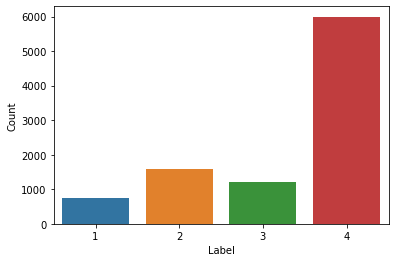

In [11]:
sns.barplot(x = target.Label , y = target.Count)

In [12]:
train_income.Target.value_counts(normalize = True)*100

4    62.739353
2    16.710265
3    12.650413
1     7.899969
Name: Target, dtype: float64

###### We can see clearly from the above data of Target variable that Target column has four unique records and 4 th has maximum no of records

#### EDA - Activities on dataset(Train)

In [13]:
train_income.shape

(9557, 143)

In [14]:
test_income.shape

(23856, 142)

In [15]:
train_income.keys()
# By keys we can see Target column is present in train dataset.

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [16]:
train_income.columns

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)

In [17]:
train_income.ndim

2

In [18]:
train_income.nunique()  # By nunique we can get the no of unique records of each columns.

Id                 9557
v2a1                157
hacdor                2
rooms                11
hacapo                2
                   ... 
SQBovercrowding      38
SQBdependency        31
SQBmeaned           155
agesq                97
Target                4
Length: 143, dtype: int64

In [20]:
train_income.describe()  #  Summary of the numercial data in the dataset.

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
count,2.697000e+03,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,2215.000000,9557.000000,9557.000000,...,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9557.000000,9552.000000,9557.000000,9557.000000
mean,1.652316e+05,0.038087,4.955530,0.023648,0.994768,0.957623,0.231767,1.404063,0.385895,1.559171,...,74.222769,1643.774302,19.132887,53.500262,3.844826,3.249485,3.900409,102.588867,1643.774302,3.302292
std,1.504571e+05,0.191417,1.468381,0.151957,0.072145,0.201459,0.421983,0.763131,0.680779,1.036574,...,76.777549,1741.197050,18.751395,78.445804,6.946296,4.129547,12.511831,93.516890,1741.197050,1.009565
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,1.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,289.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,289.000000,3.000000
50%,1.300000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,36.000000,961.000000,16.000000,36.000000,1.000000,2.250000,0.444444,81.000000,961.000000,4.000000
75%,2.000000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,2.000000,...,121.000000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,134.560010,2601.000000,4.000000
max,2.353477e+06,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,6.000000,5.000000,8.000000,...,441.000000,9409.000000,169.000000,441.000000,81.000000,36.000000,64.000000,1369.000000,9409.000000,4.000000


### Task - 2  Understanding the Type of Data.

In [19]:
train_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


##### Data has all three datatypes -
##### Float(64) - Float datatype has 8 features in dataset
##### Int(64) - Integer datatype has 130 features in the dataset.
##### Object(5) - Object datatype has 5 features in the dataset.

In [20]:
# Checking the object unique values - 

train_income.describe(include = 'object')

,Id,idhogar,dependency,edjefe,edjefa
count,9557,9557,9557,9557,9557
unique,9557,2988,31,22,22
top,ID_9a5ad0665,fd8a6d014,yes,no,no
freq,1,13,2192,3762,6230


### 

### Task - 3 Check if there any bias in the dataset - Bias can be check by checking the outliers and null values in the dataset and statistical deviation in the dataset.

In [21]:
#### Checking the na values in  the dataset.
train_income.isna().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

In [22]:
train_income.isna().any().any()

True

In [23]:
train_income.isna()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9553,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9554,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9555,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

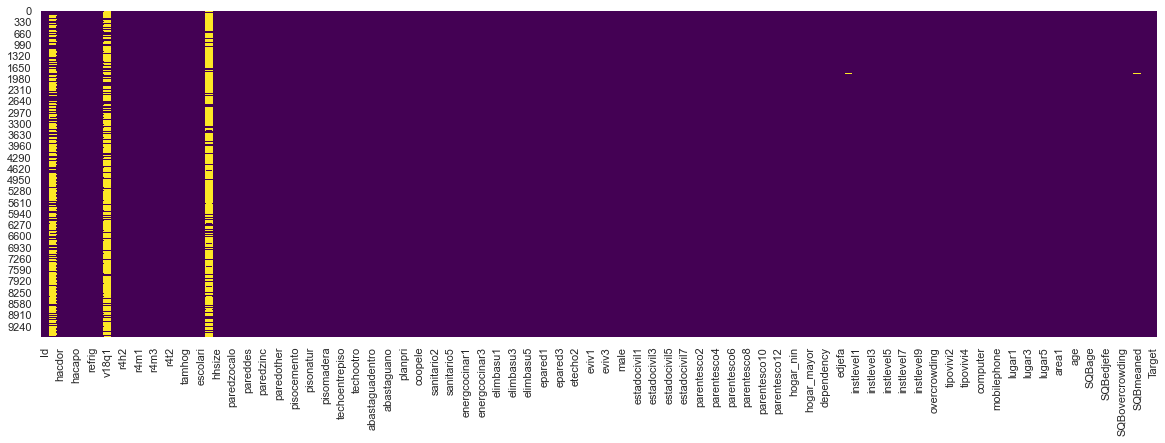

In [24]:
# Getting the heatmap to get more visuliaze null values
sns.set(rc = {'figure.figsize' : (20,6)})
sns.heatmap(train_income.isna(),cmap = 'viridis' , cbar = False)

In [25]:
train_income.loc[train_income.v18q1.isna().sum(),['v18q1']] # Getting the sum of individual columns null values.

v18q1    NaN
Name: 7342, dtype: object

In [26]:
train_income.loc[train_income.v2a1.isna().sum(),['v2a1']] # Getting the sum of individual columns null values.

v2a1    NaN
Name: 6860, dtype: object

In [28]:
train_income.loc[train_income.rez_esc.isna().sum(),['rez_esc']] # Getting the sum of individual columns null values.

rez_esc    NaN
Name: 7928, dtype: object

In [47]:
# Performing the chi square test to check the relation between two categorical variables by p values to check the bias.

from scipy.stats import chi2_contingency

result = chi2_contingency(pd.crosstab(train_income.v18q , train_income.v18q1)) # Performing the chi2_contingency test. 
print(result)

alpha = 0.05

if (result[1]<=alpha):
    
    print('Significat relation between v18q and v18q1')
    
else:
    
    print('No significant relation between v18q and v18q1\nP-Value is greater than 0.05 so we accept H0 = ',  result[1])

(0.0, 1.0, 0, array([[1586.,  444.,  129.,   37.,   13.,    6.]]))
No significant relation between v18q and v18q1
P-Value is greater than 0.05 so we accept H0 =  1.0


##### So we checked by chi square test between two catrgorical variables that there is no significant relation between v18q and v18q1

#### 

###### Checking for outliers in the dataset to check the data is bias or not

In [30]:

outliers = train_income.select_dtypes(exclude = 'object')
outliers

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,190000.0,0,3,0,1,1,0,NaN,0,1,...,100,1849,1,100,0,1.000000,0.0000,100.0000,1849,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,4489,1,144,0,1.000000,64.0000,144.0000,4489,4
2,NaN,0,8,0,1,1,0,NaN,0,0,...,121,8464,1,0,0,0.250000,64.0000,121.0000,8464,4
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,81,289,16,121,4,1.777778,1.0000,121.0000,289,4
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,1369,16,121,4,1.777778,1.0000,121.0000,1369,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,80000.0,0,6,0,1,1,0,NaN,0,2,...,81,2116,25,81,1,1.562500,0.0625,68.0625,2116,2
9553,80000.0,0,6,0,1,1,0,NaN,0,2,...,0,4,25,81,1,1.562500,0.0625,68.0625,4,2
9554,80000.0,0,6,0,1,1,0,NaN,0,2,...,25,2500,25,81,1,1.562500,0.0625,68.0625,2500,2
9555,80000.0,0,6,0,1,1,0,NaN,0,2,...,121,676,25,81,1,1.562500,0.0625,68.0625,676,2


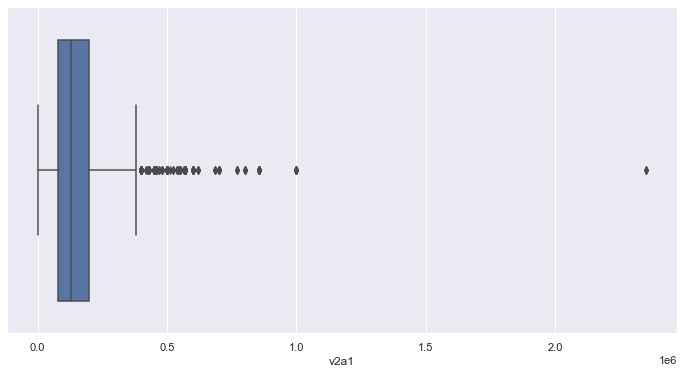

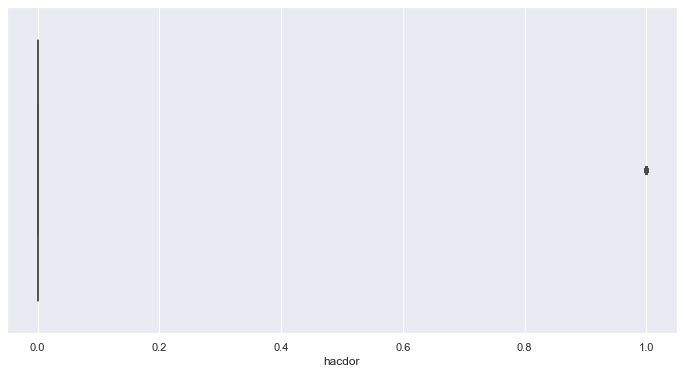

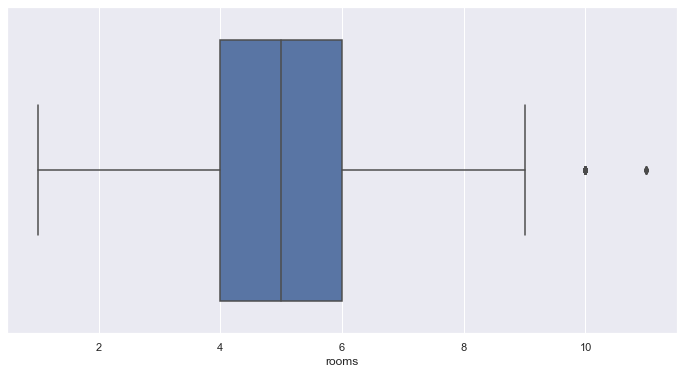

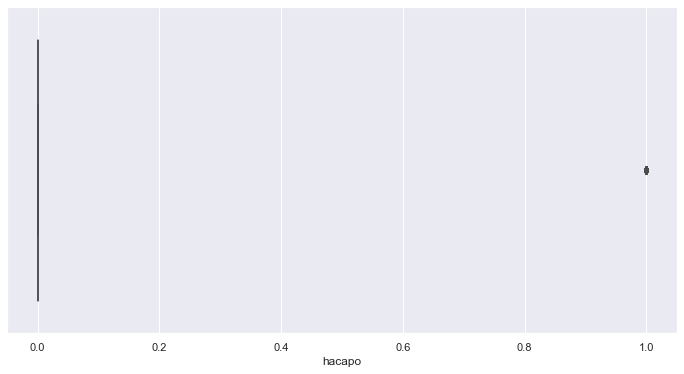

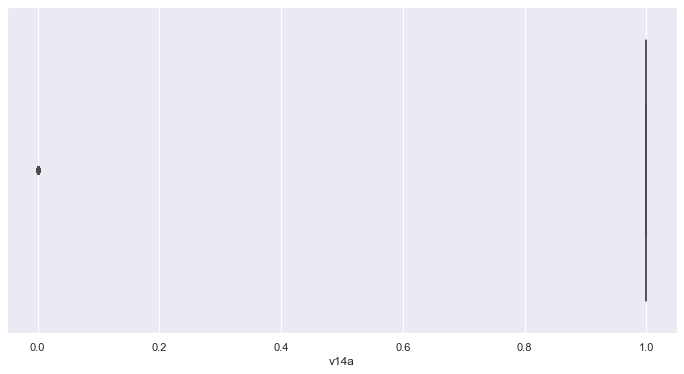

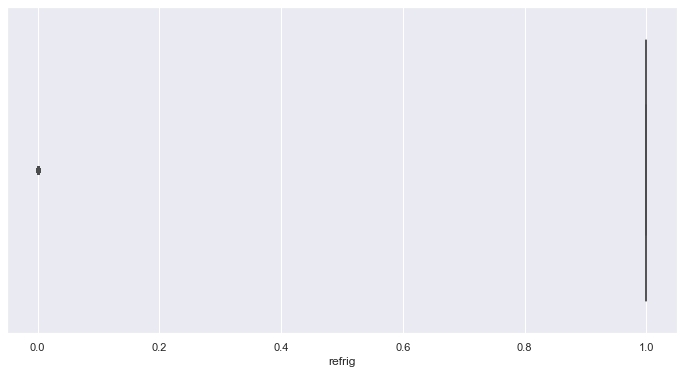

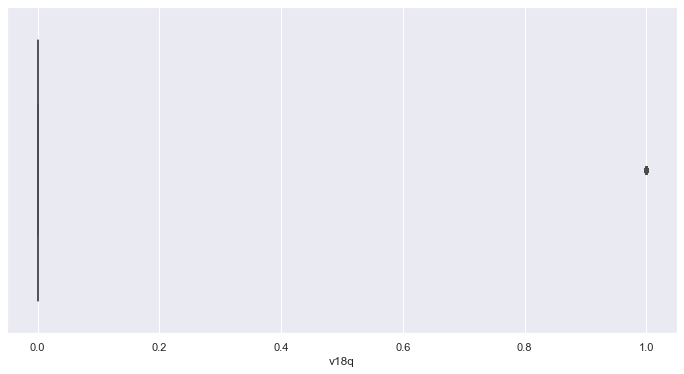

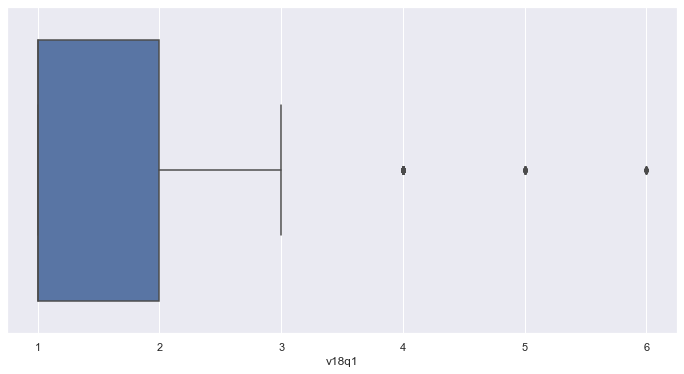

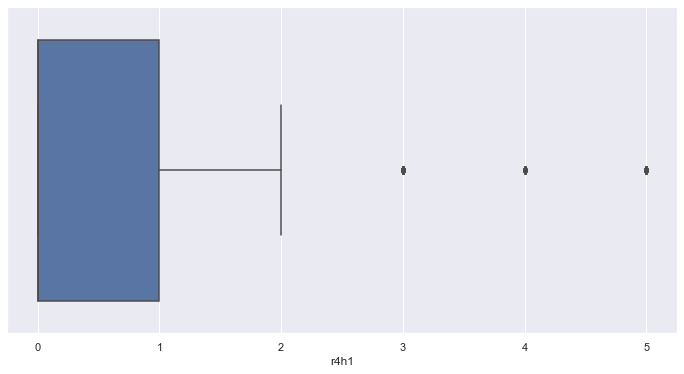

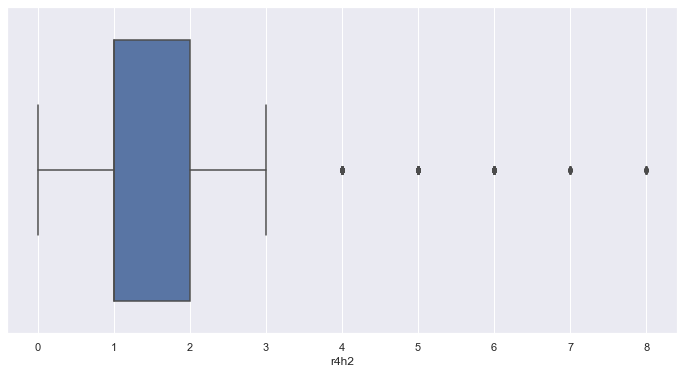

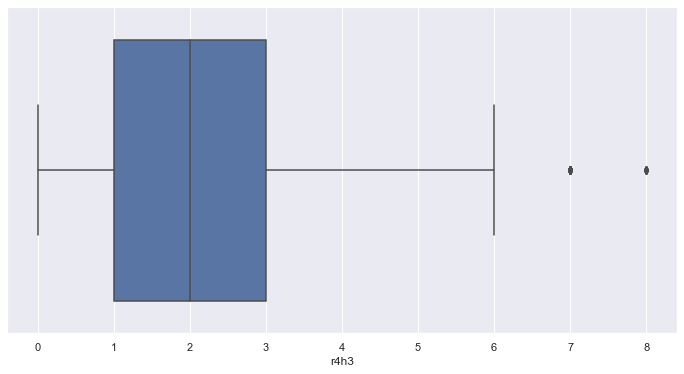

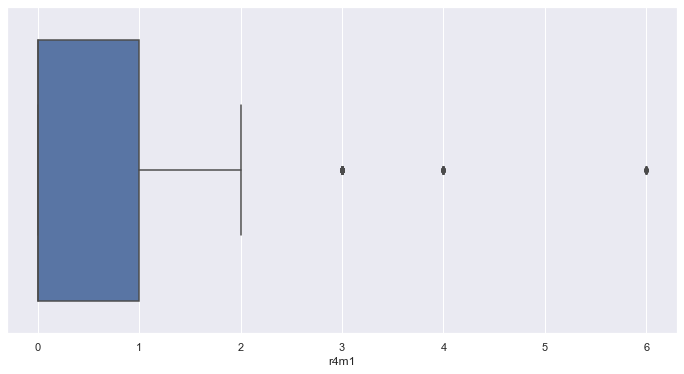

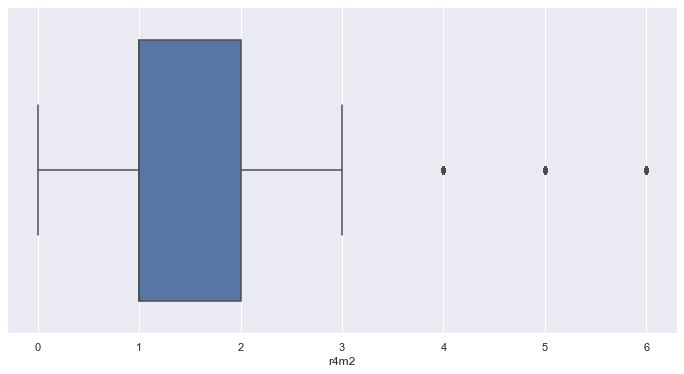

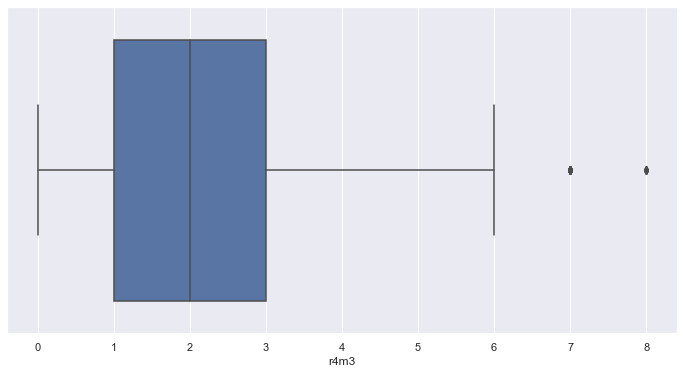

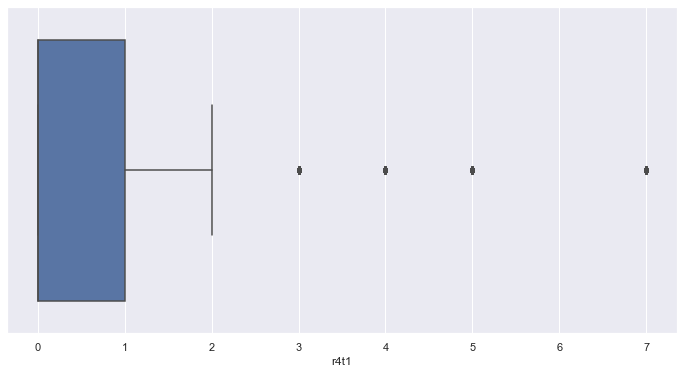

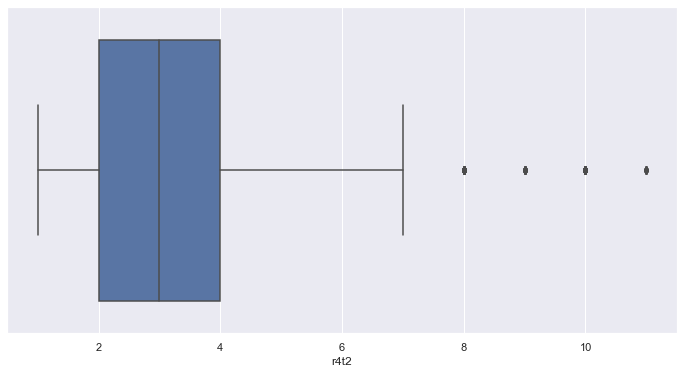

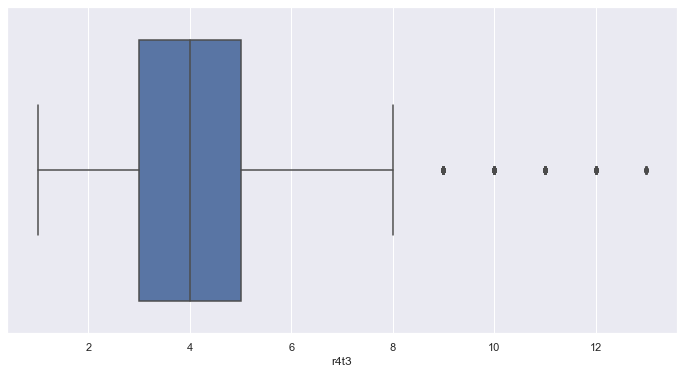

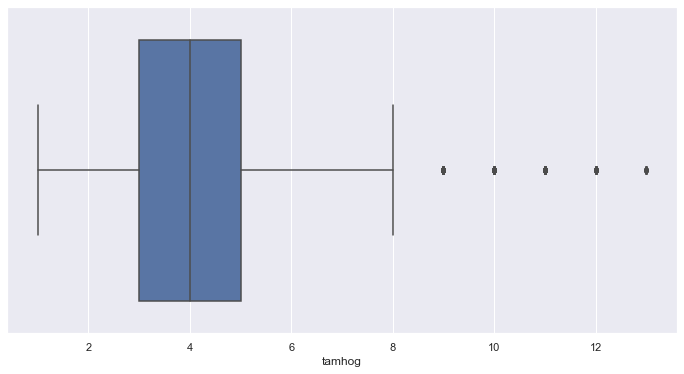

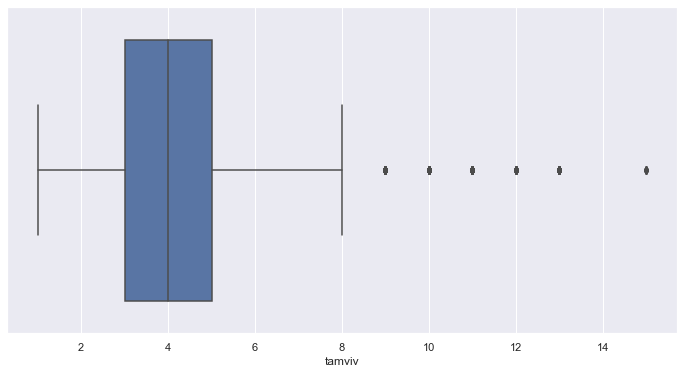

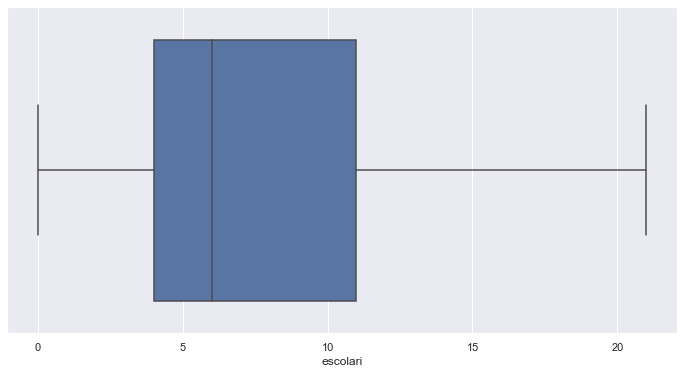

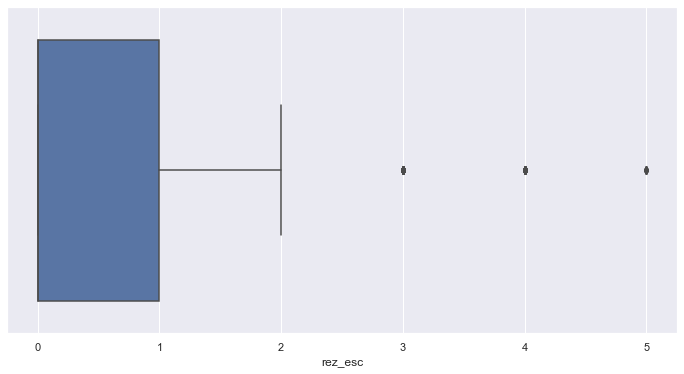

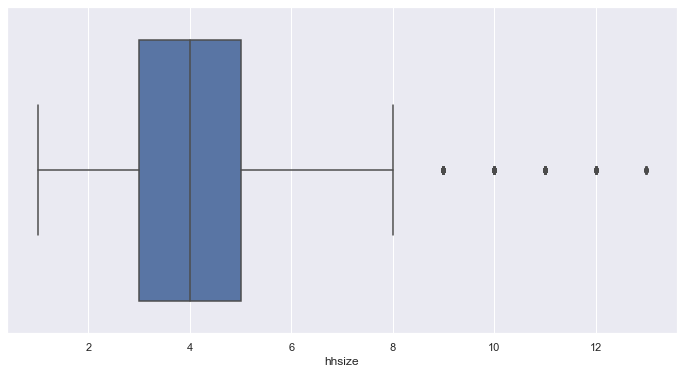

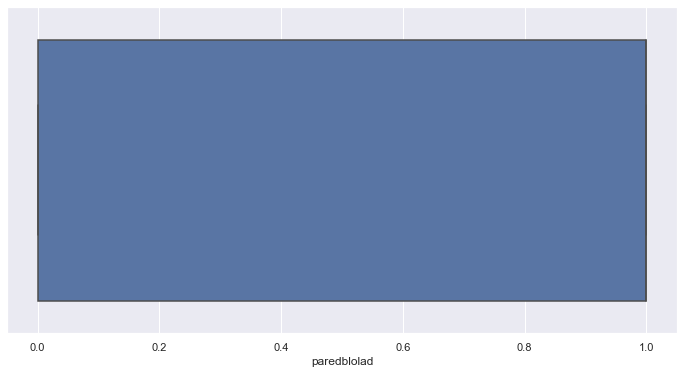

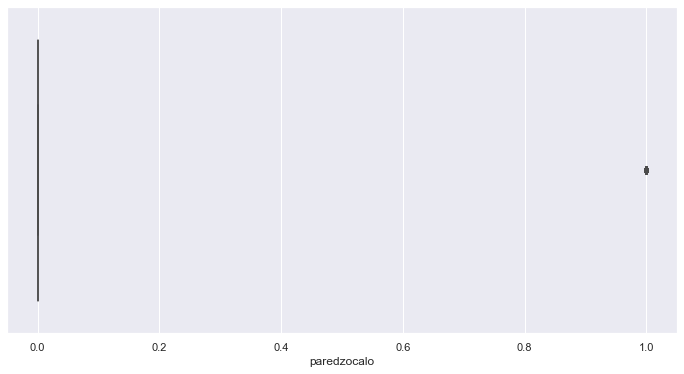

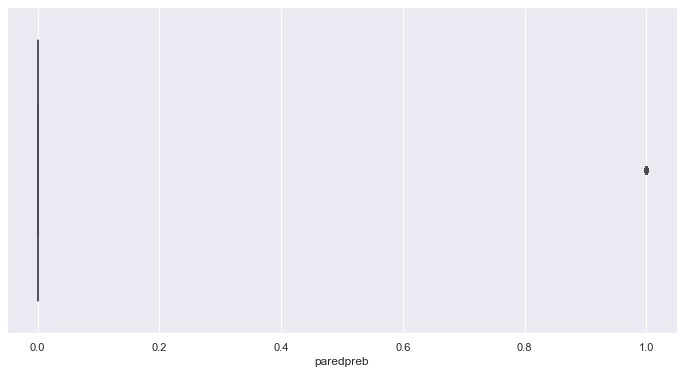

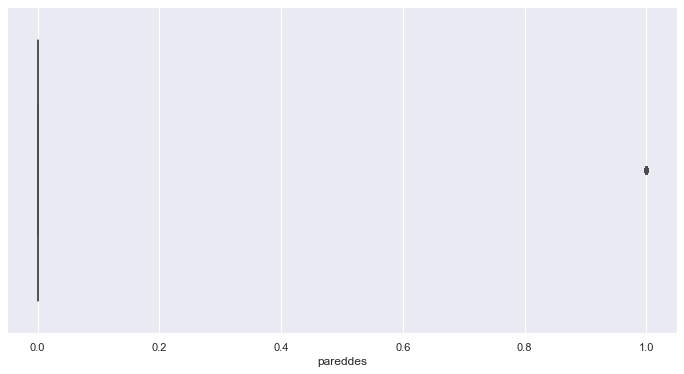

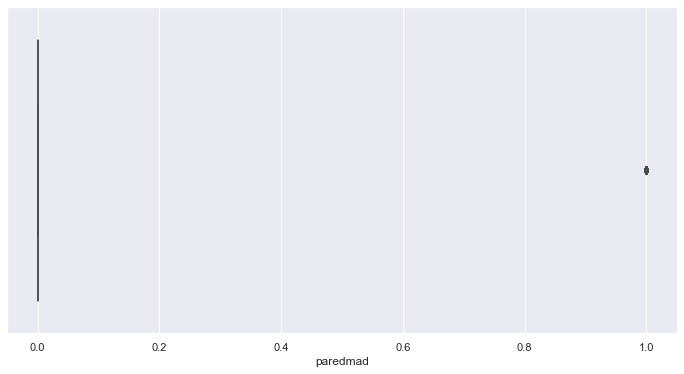

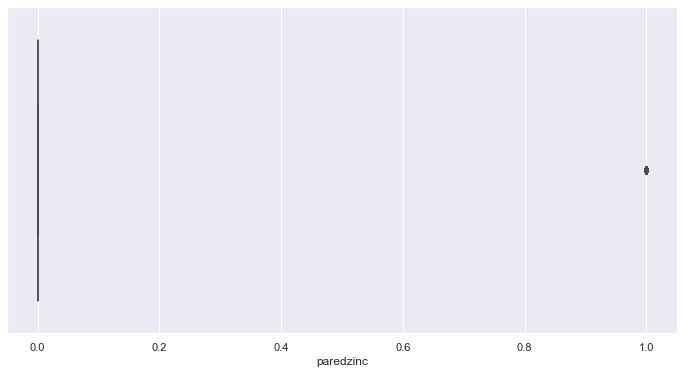

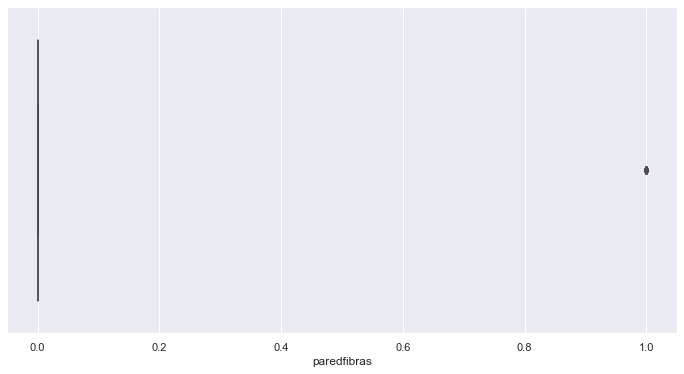

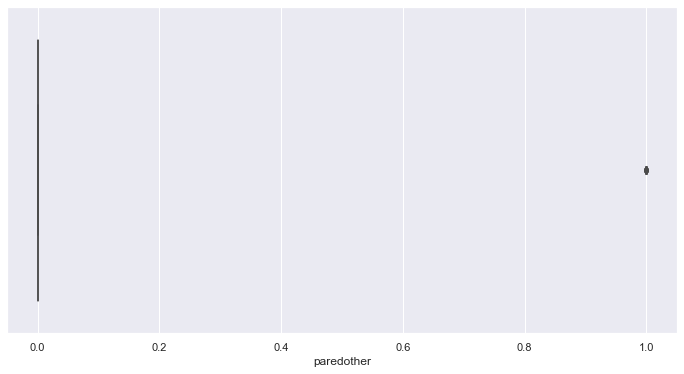

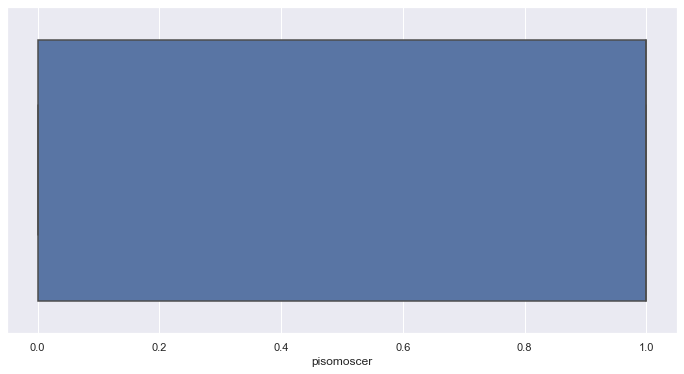

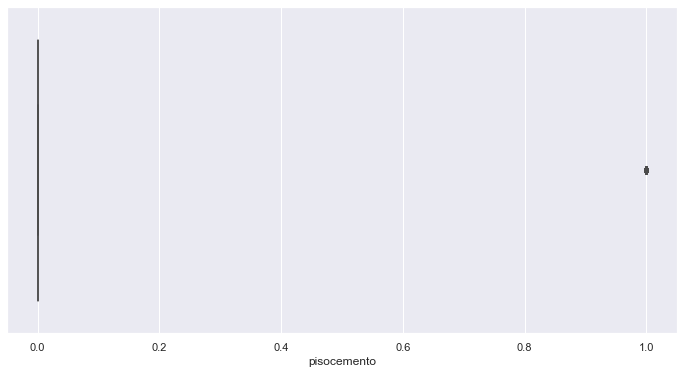

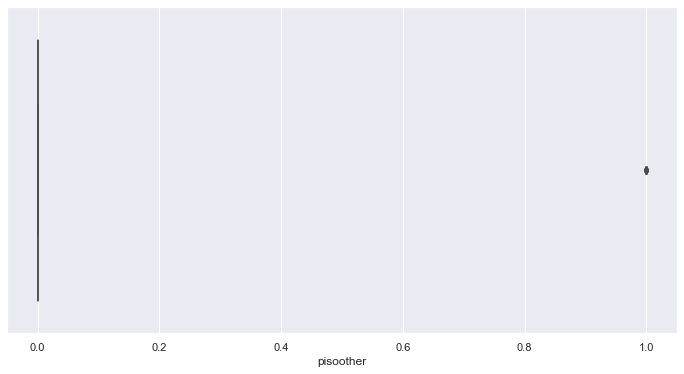

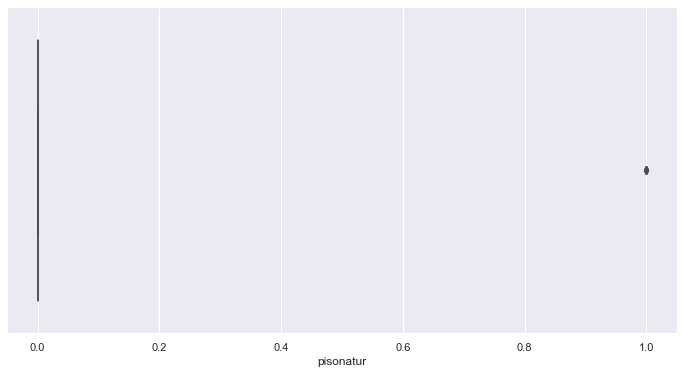

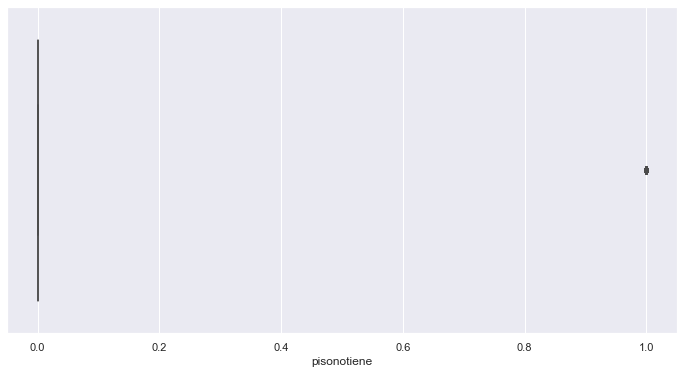

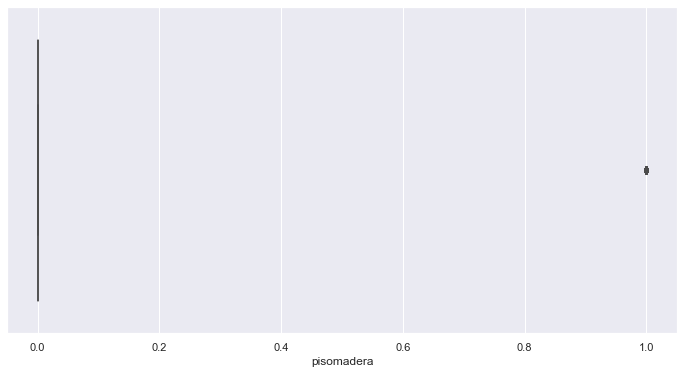

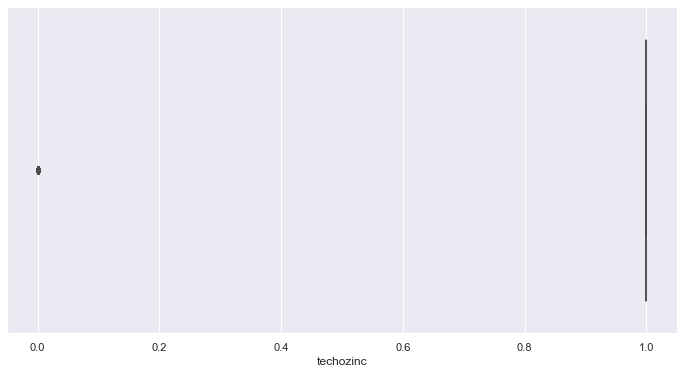

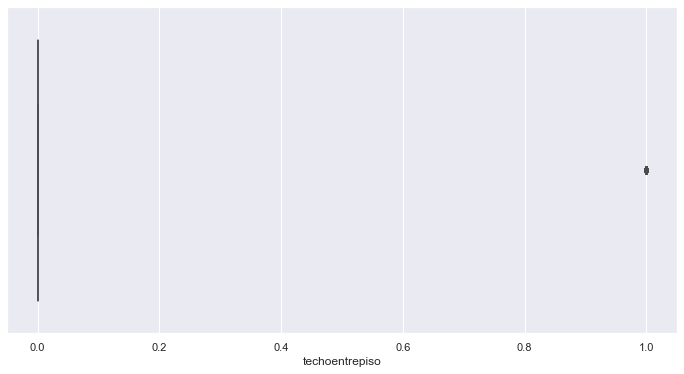

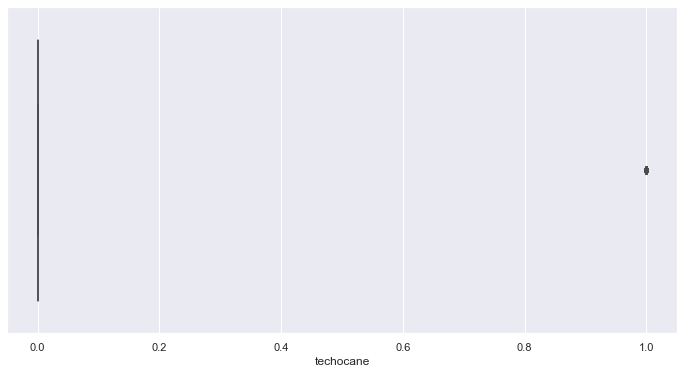

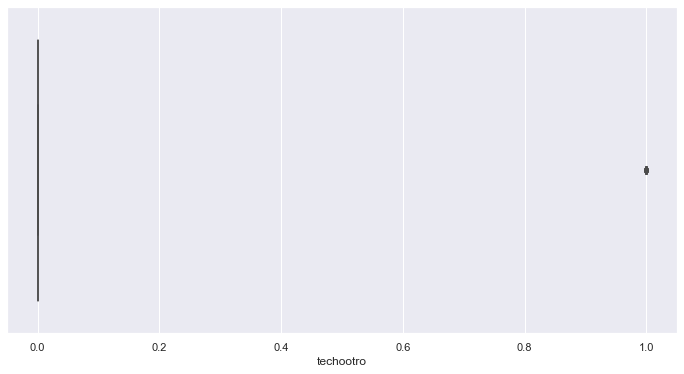

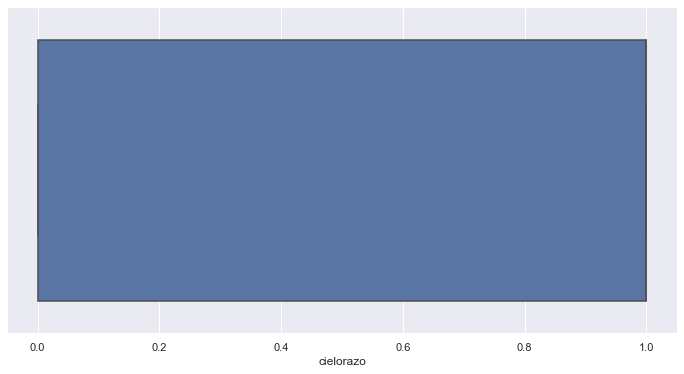

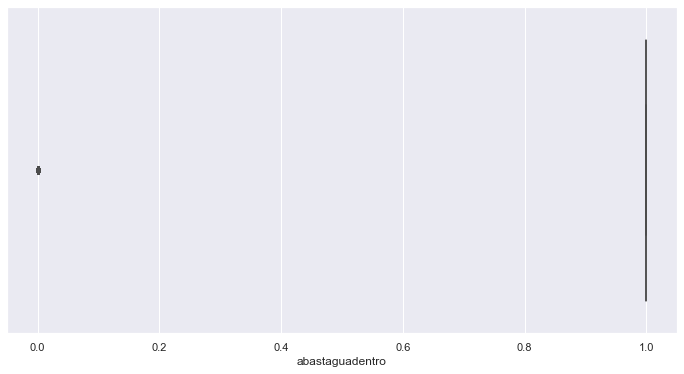

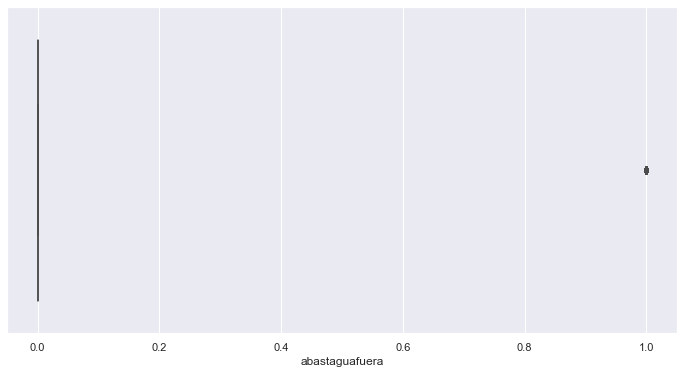

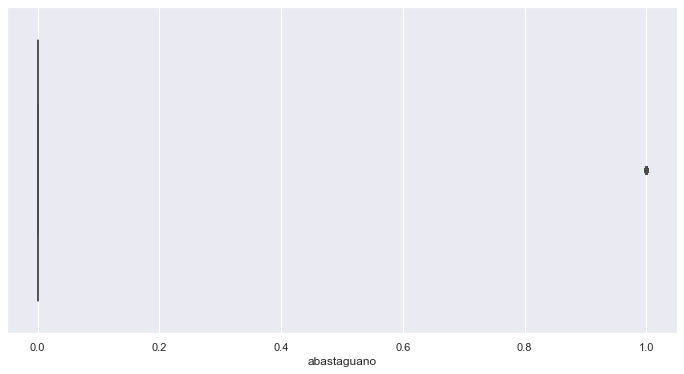

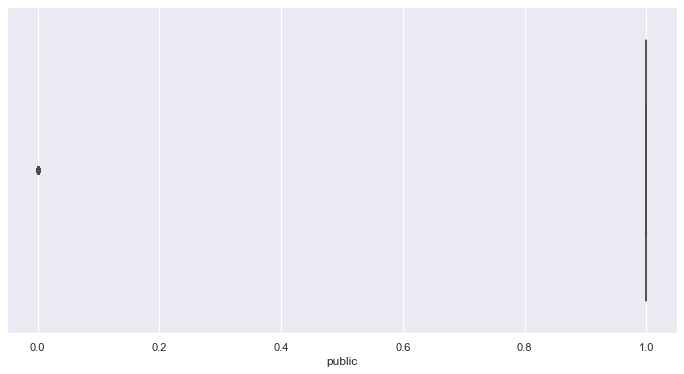

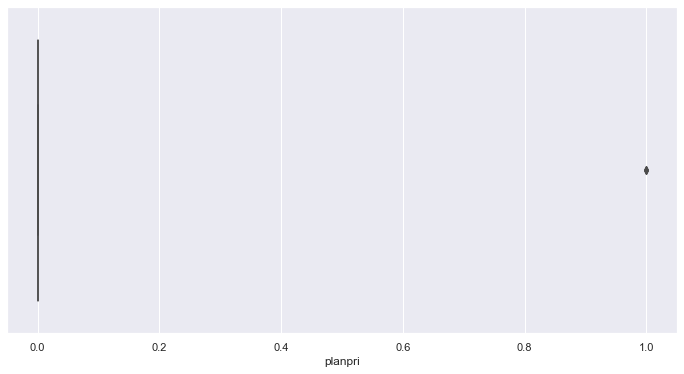

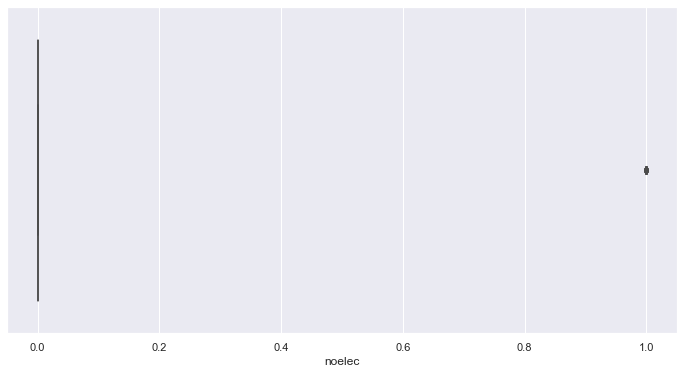

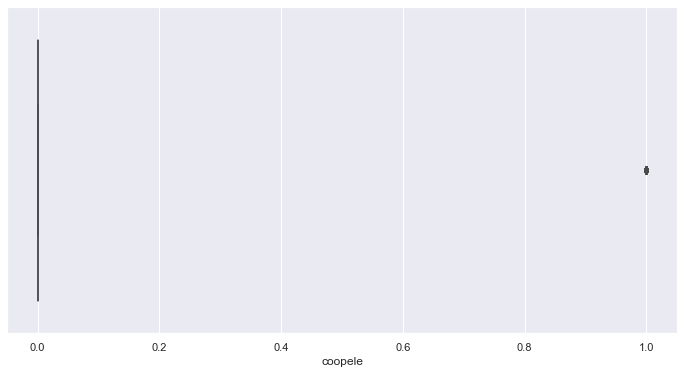

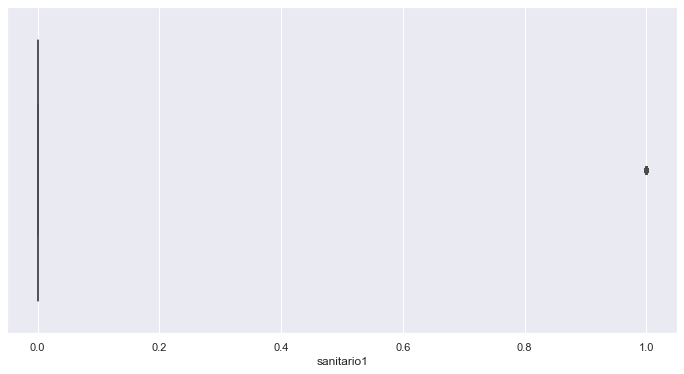

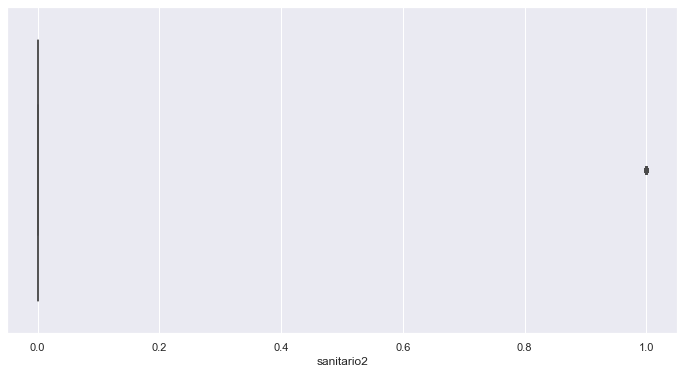

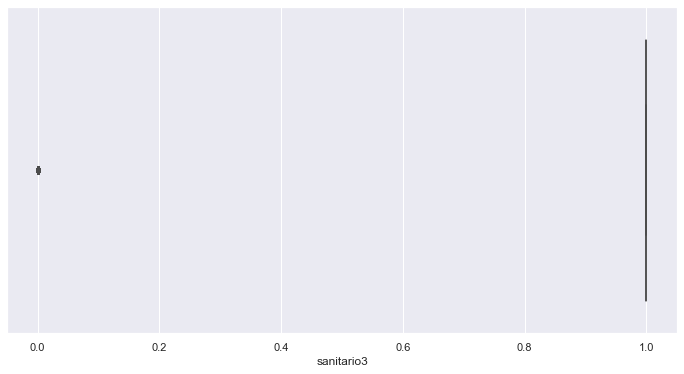

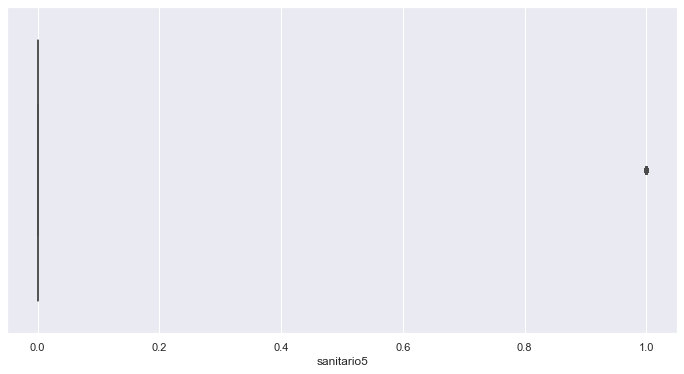

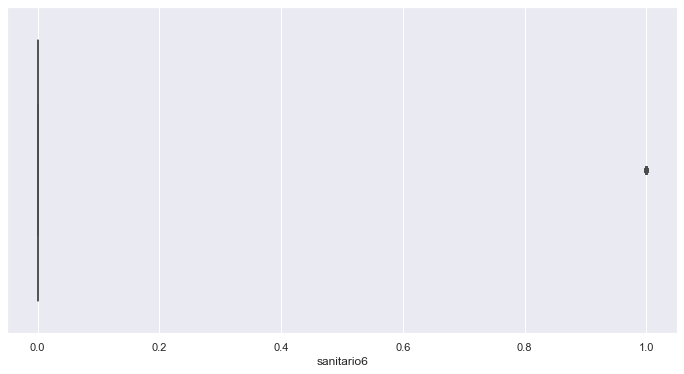

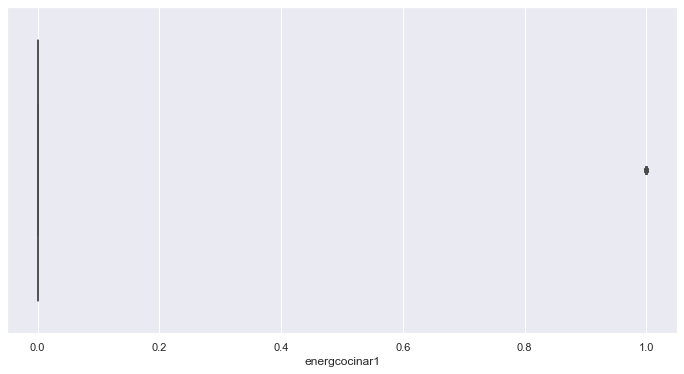

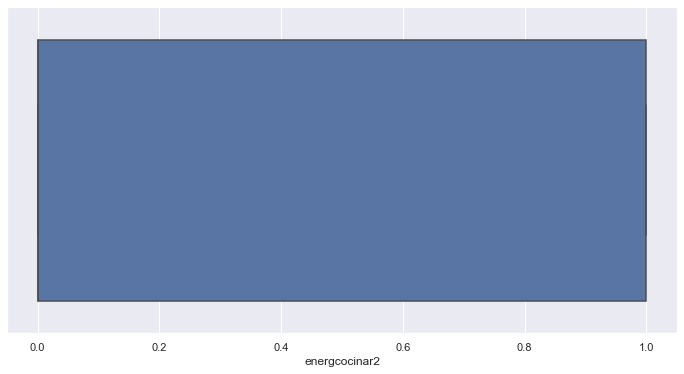

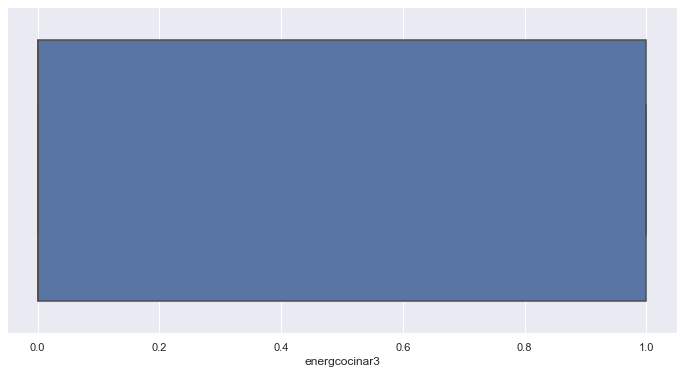

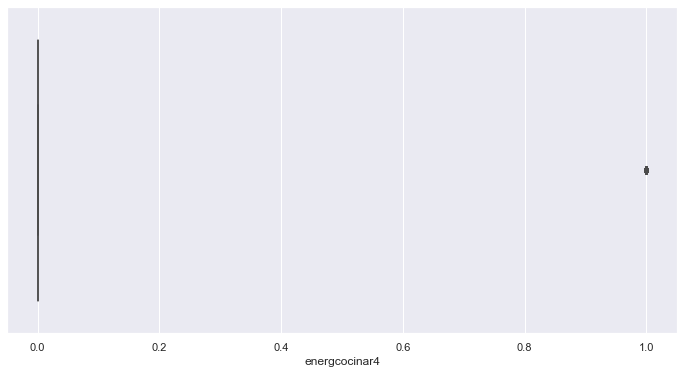

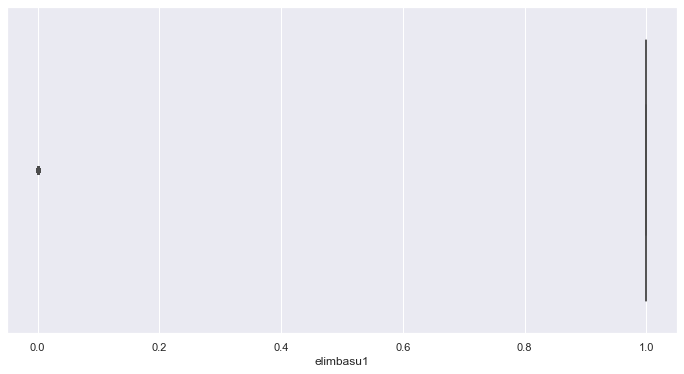

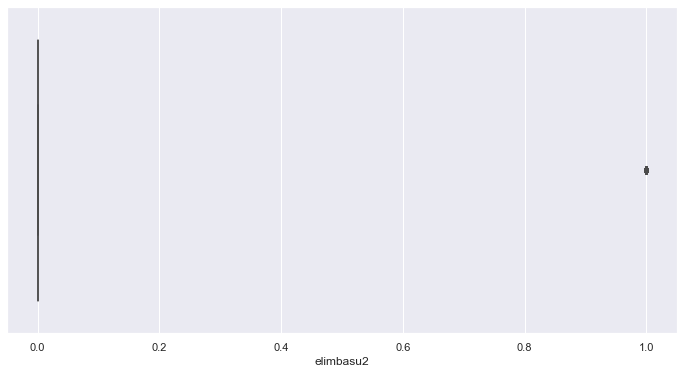

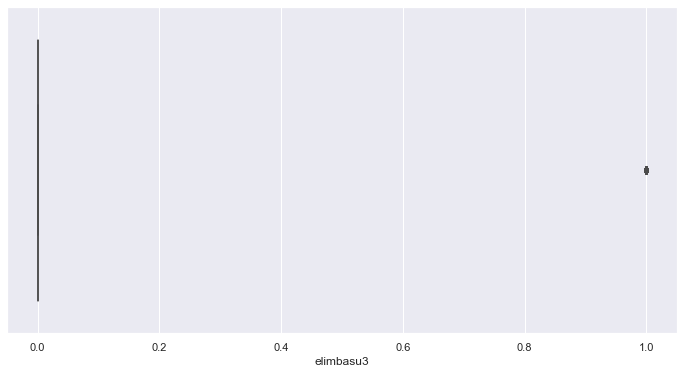

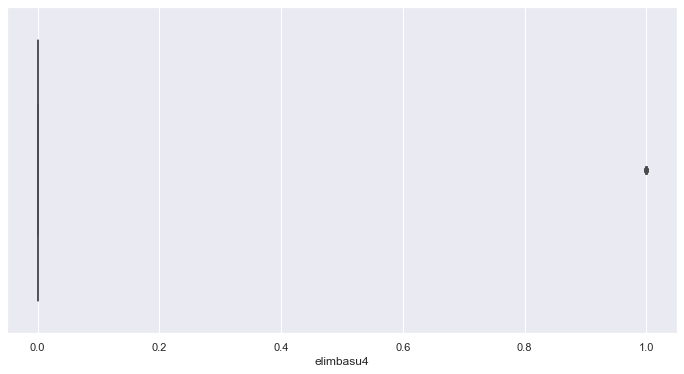

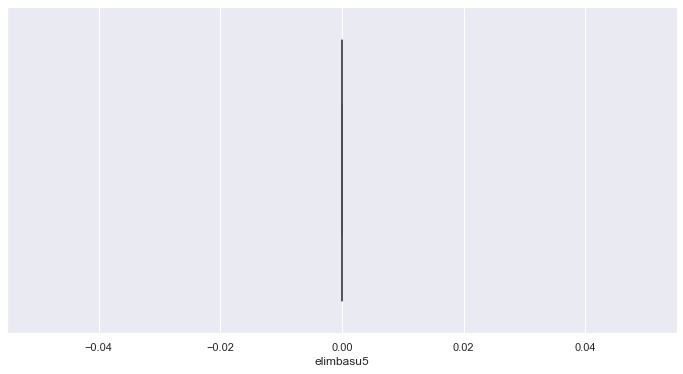

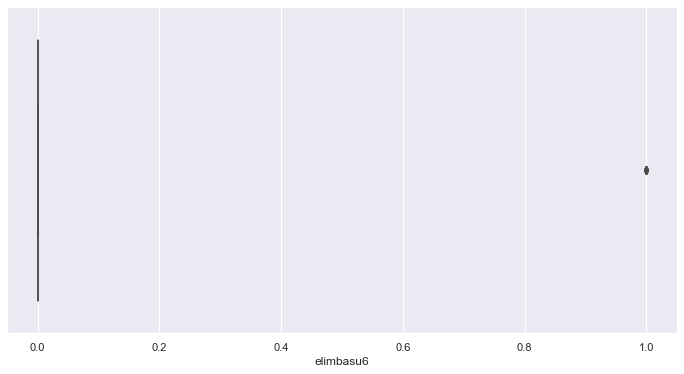

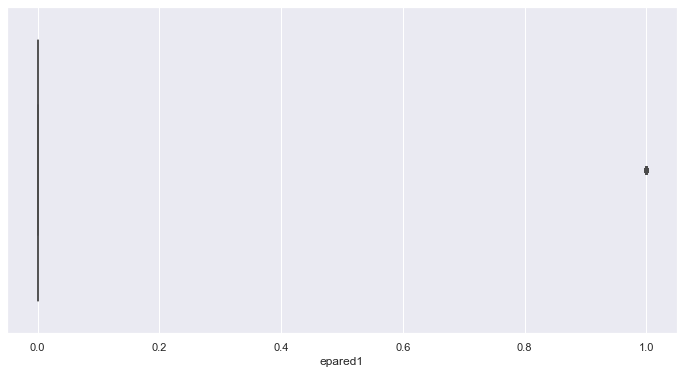

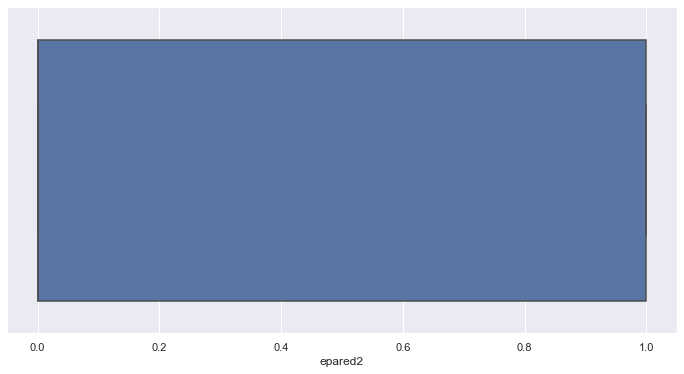

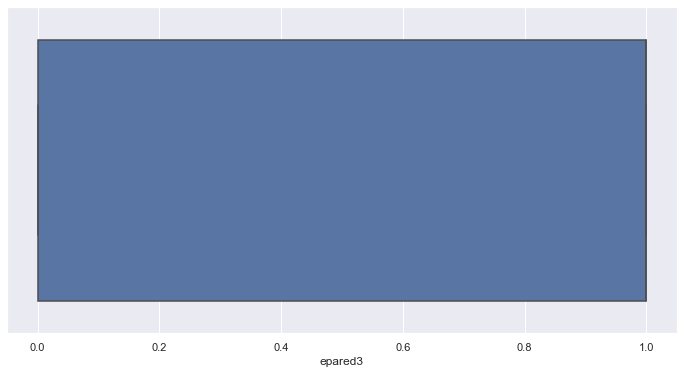

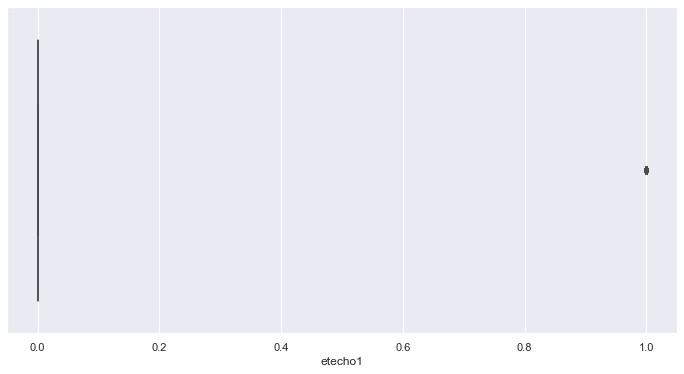

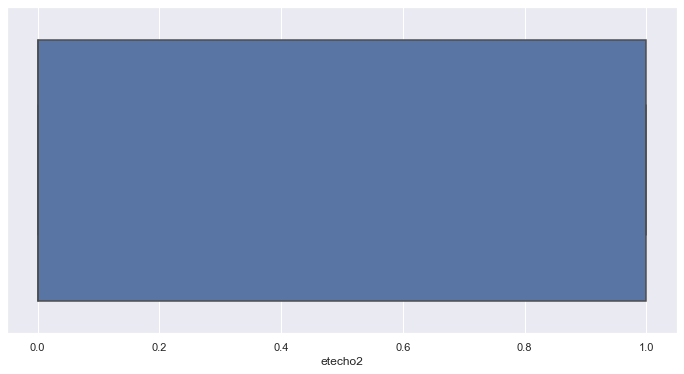

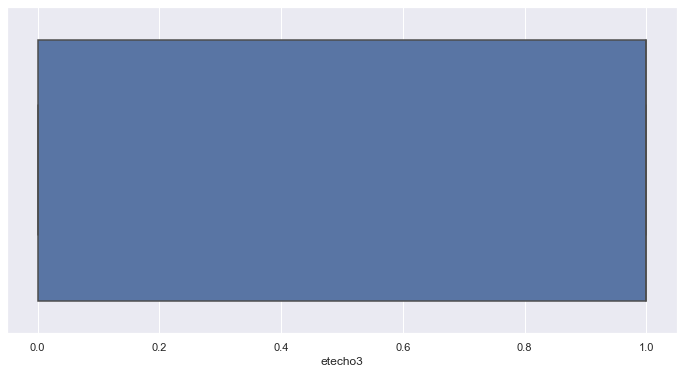

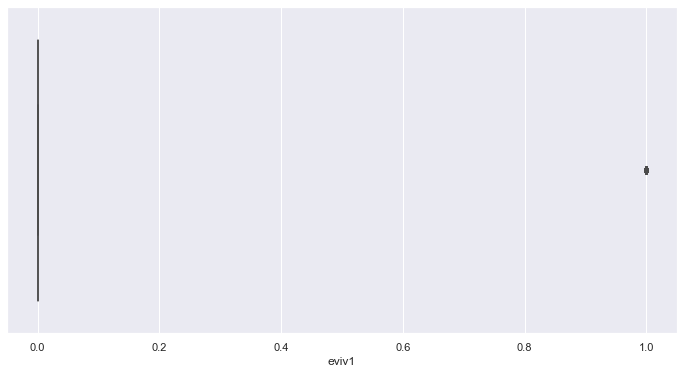

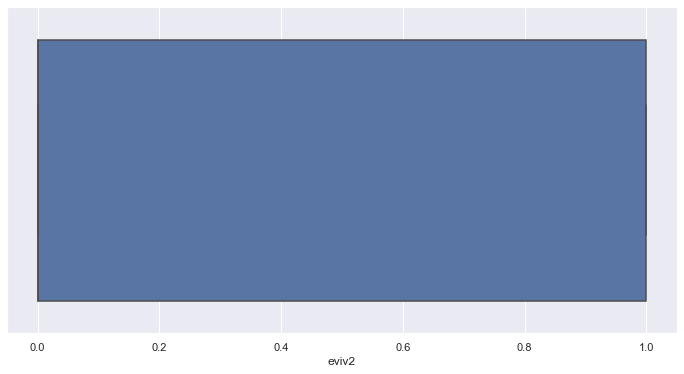

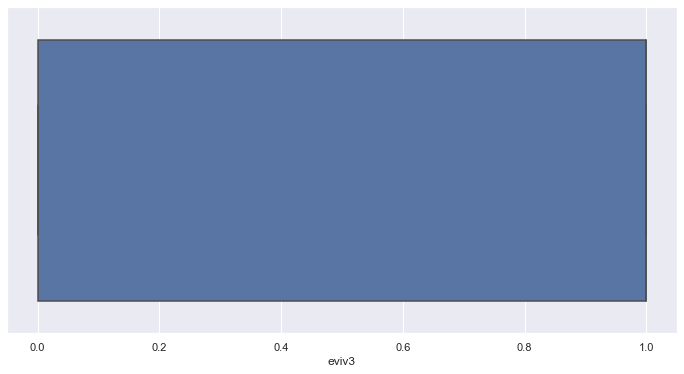

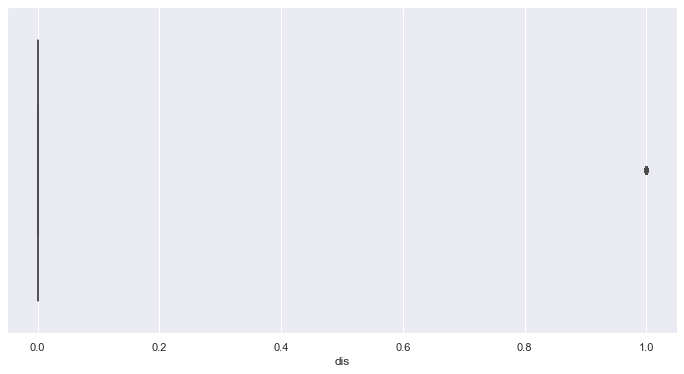

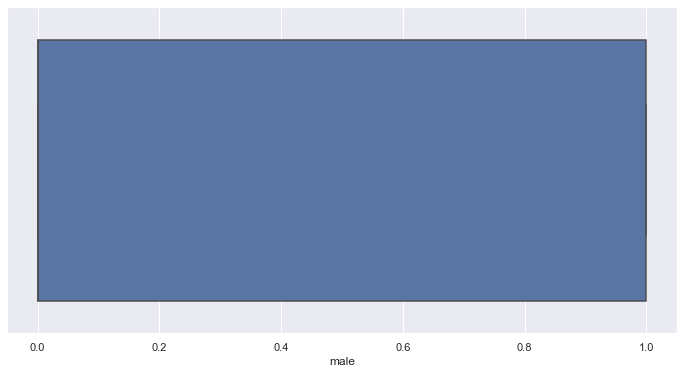

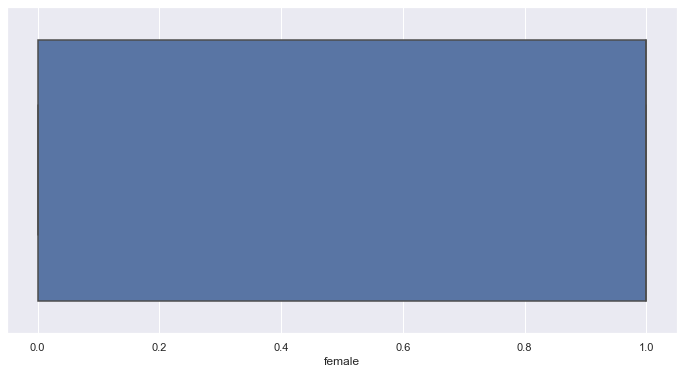

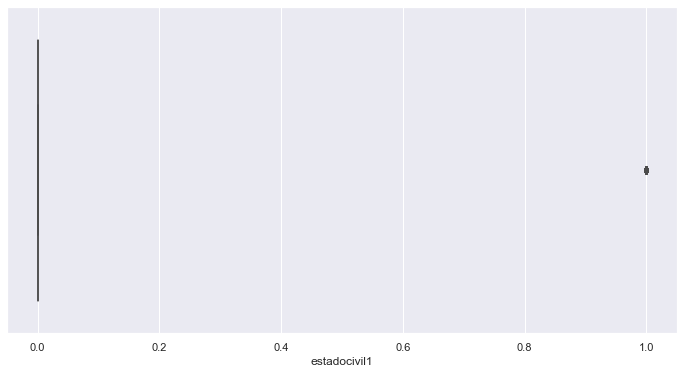

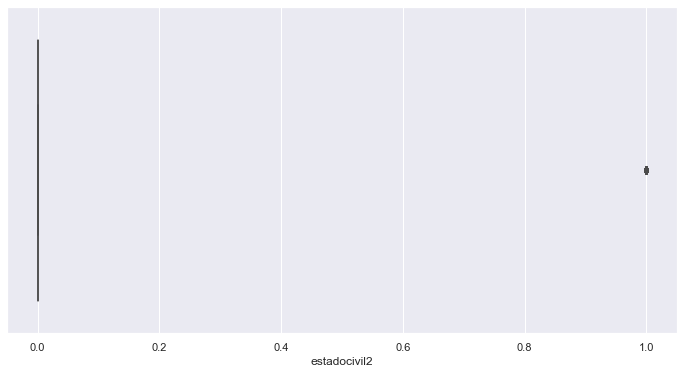

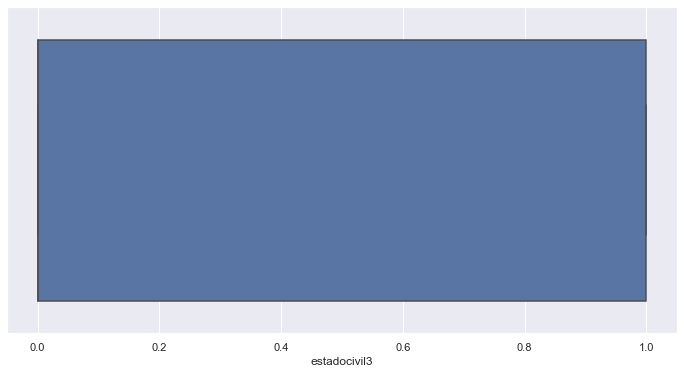

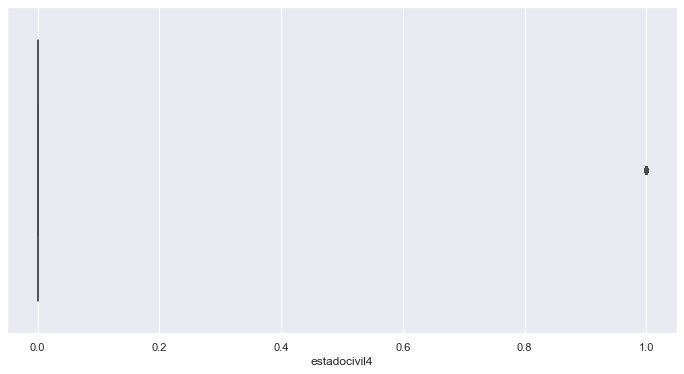

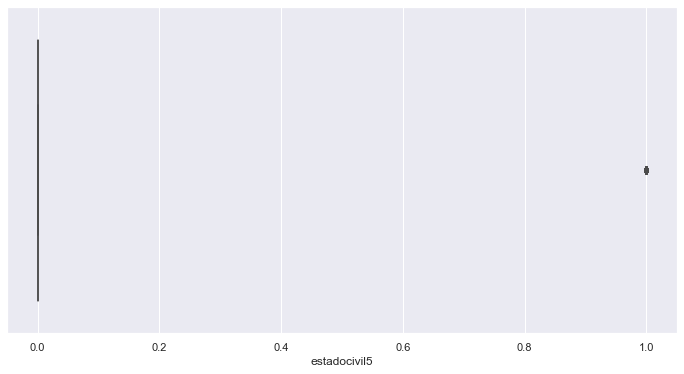

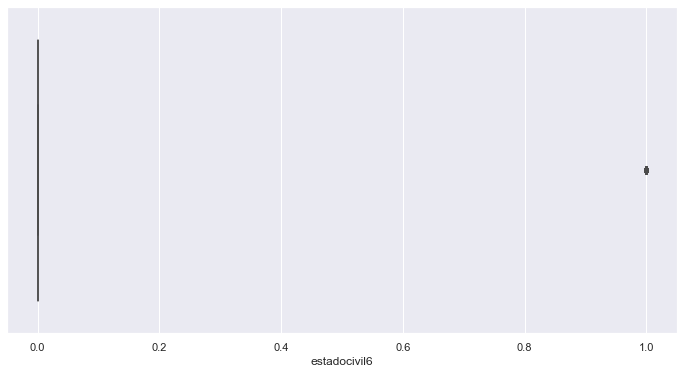

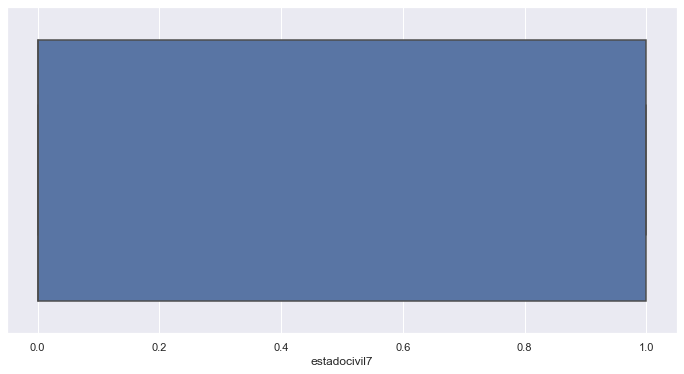

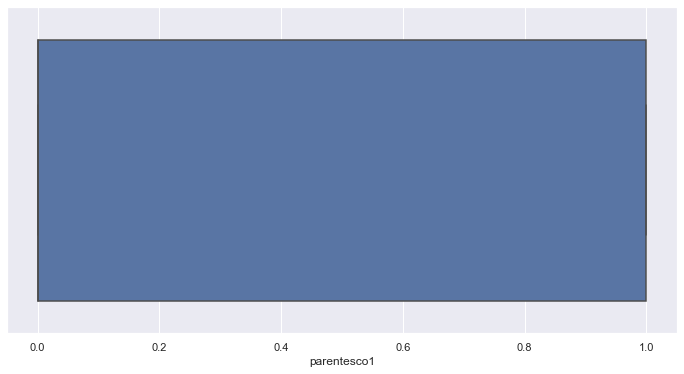

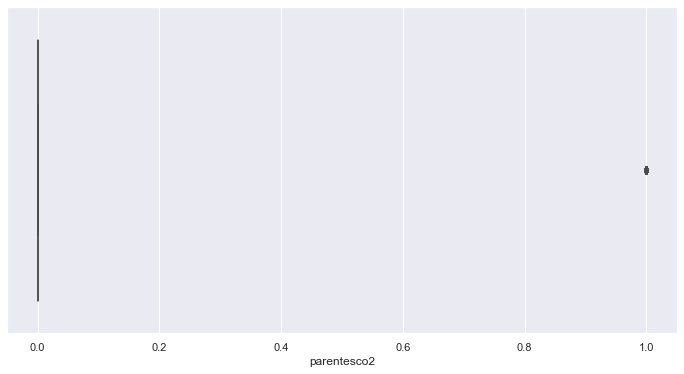

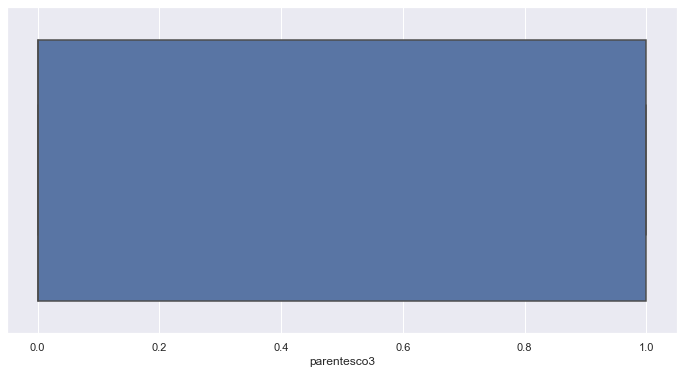

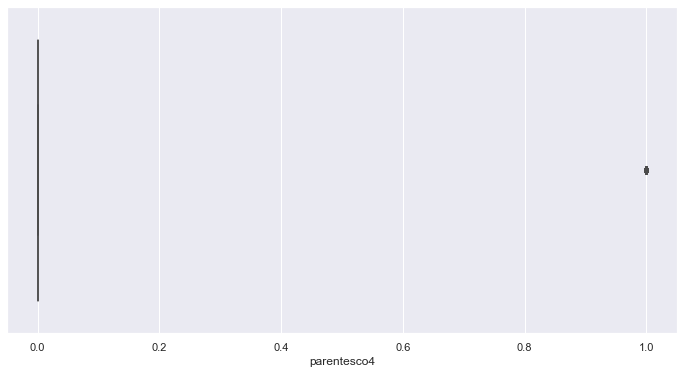

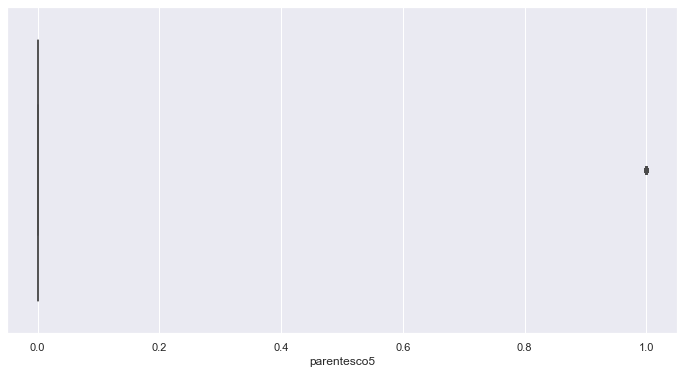

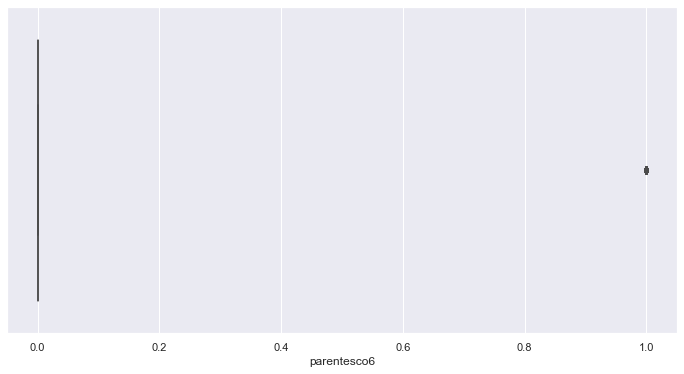

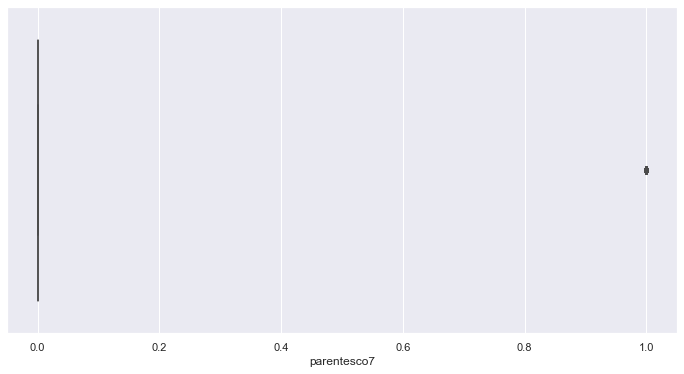

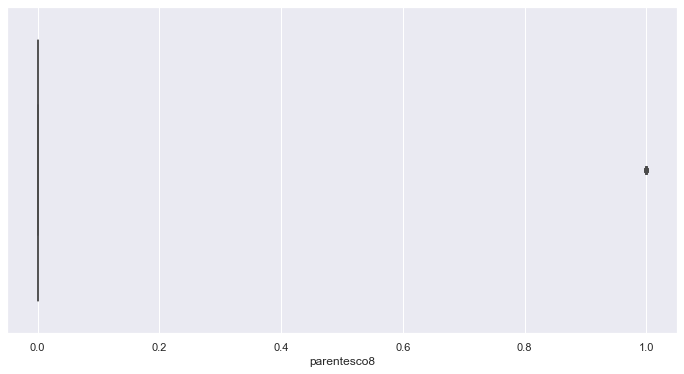

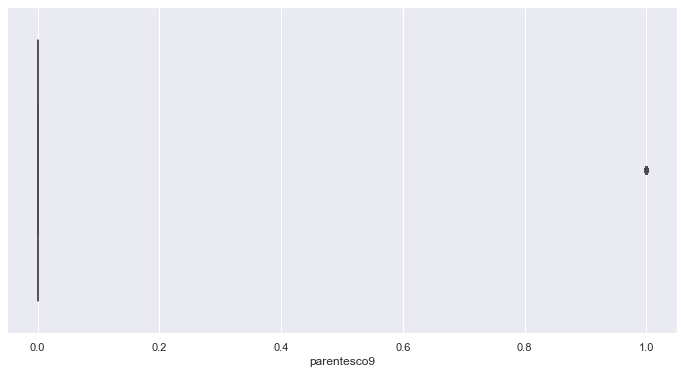

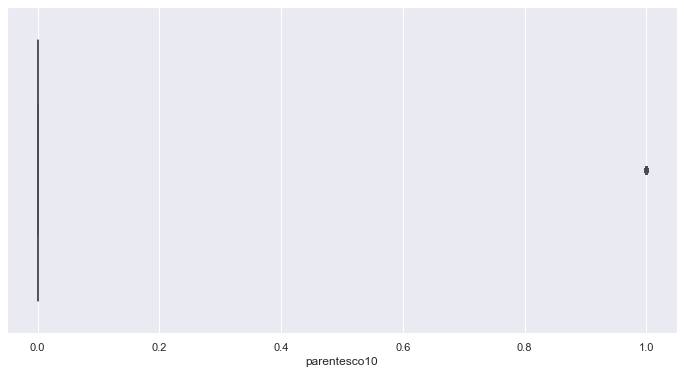

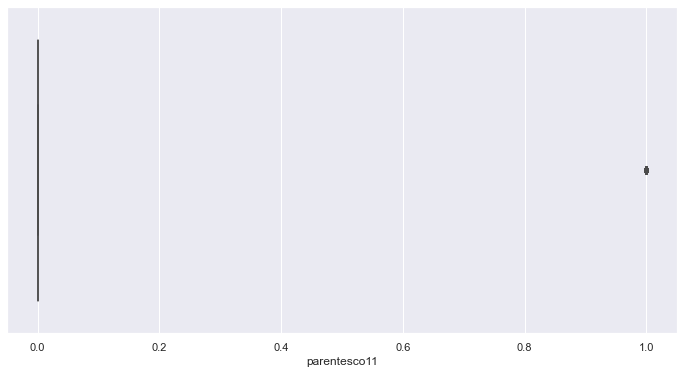

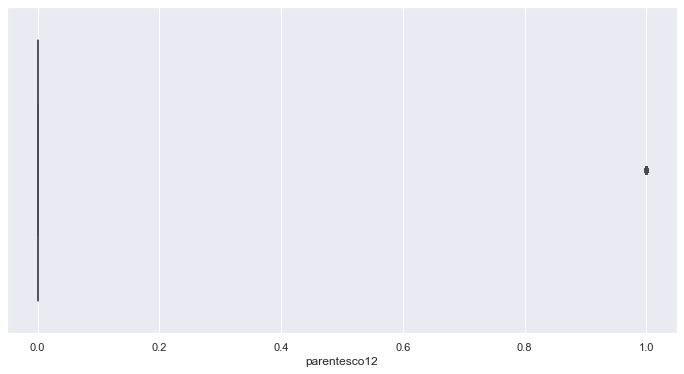

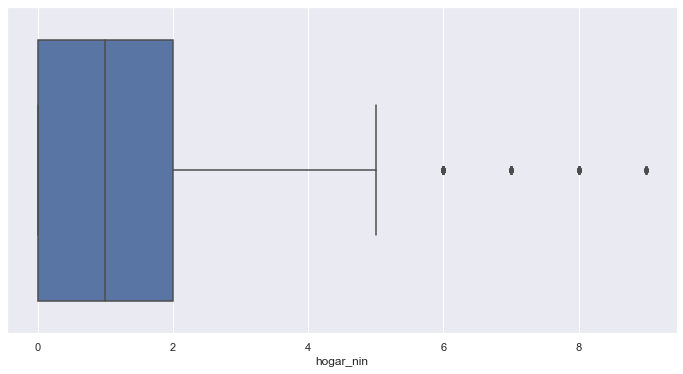

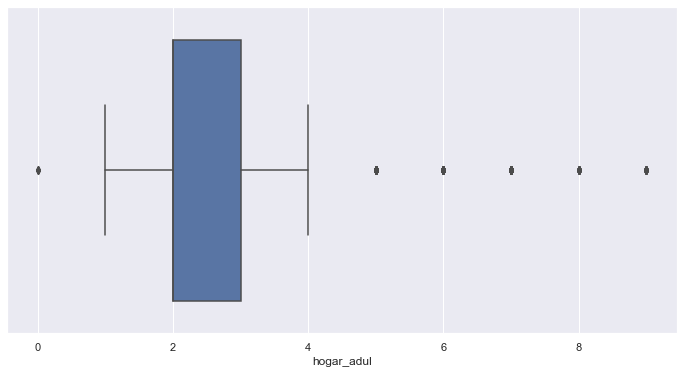

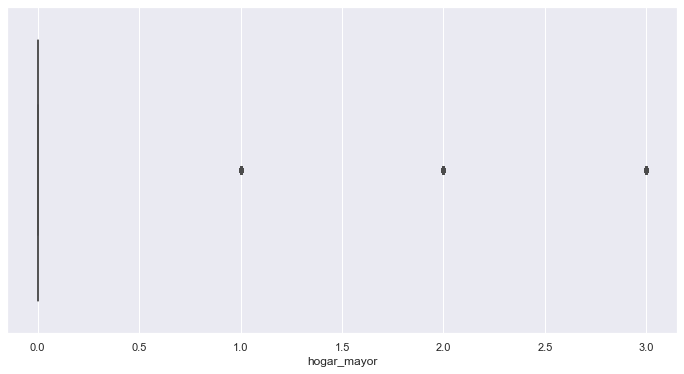

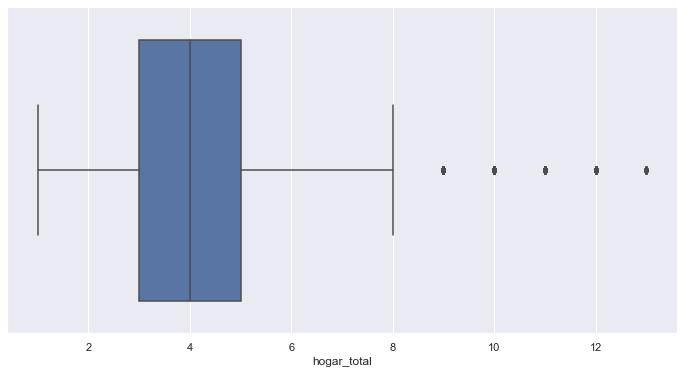

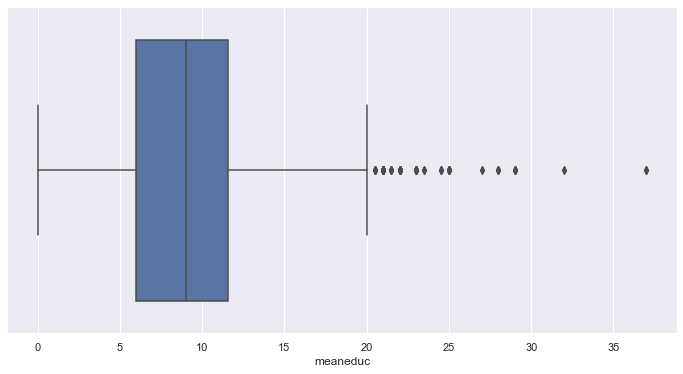

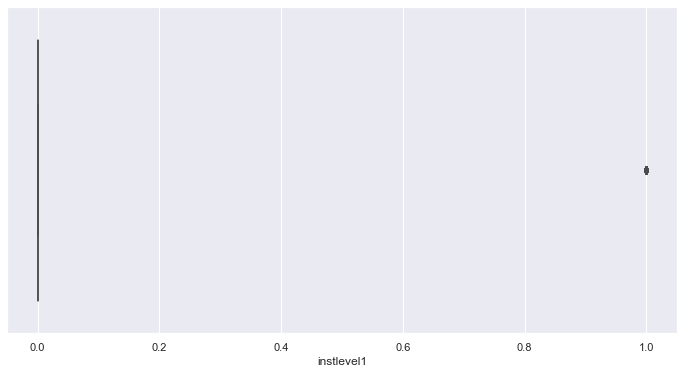

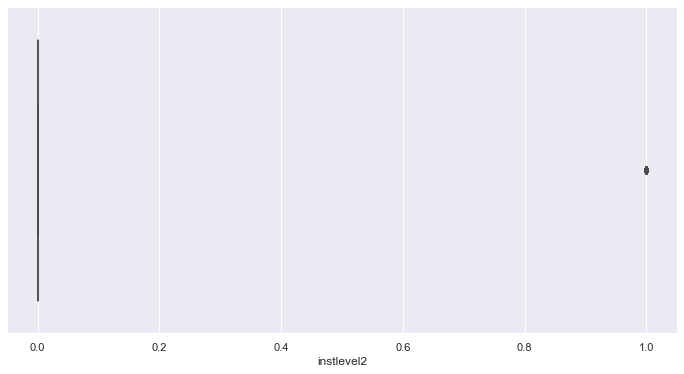

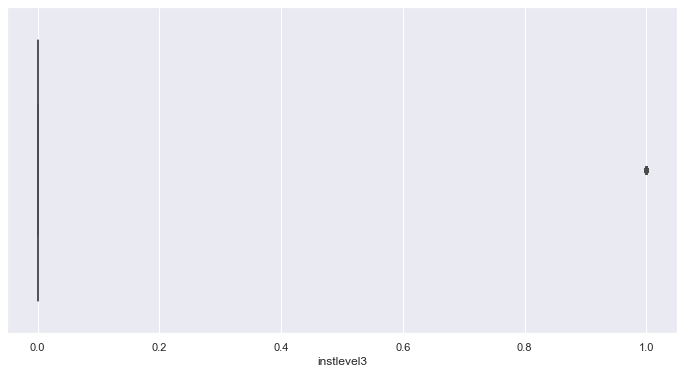

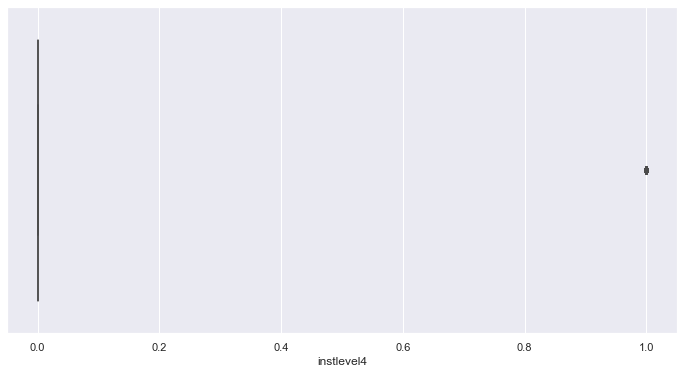

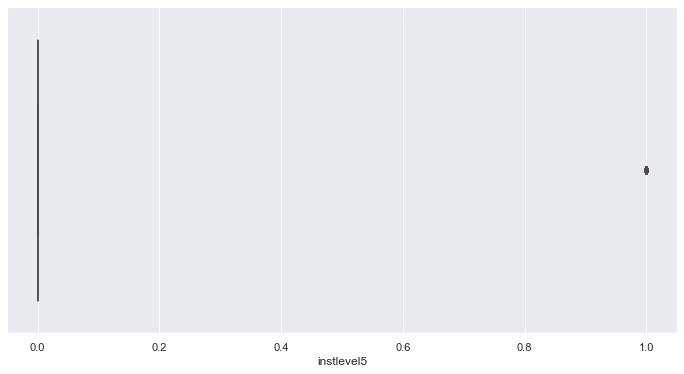

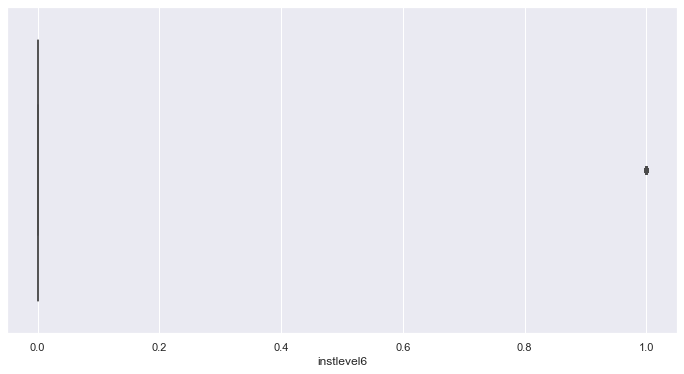

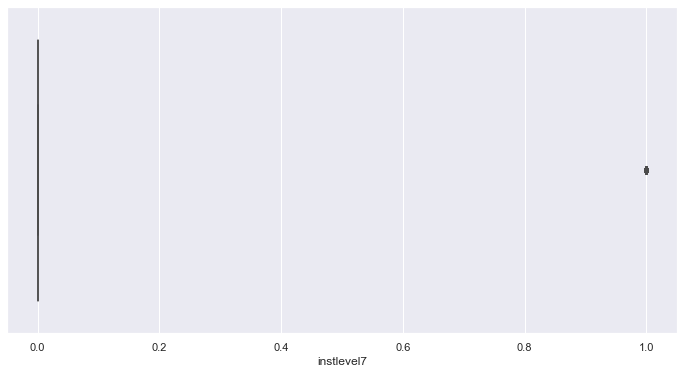

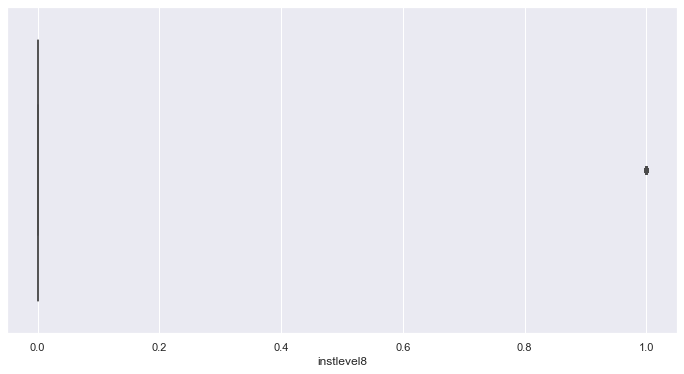

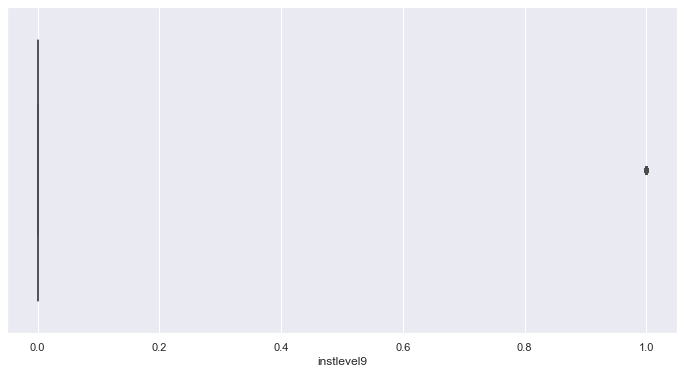

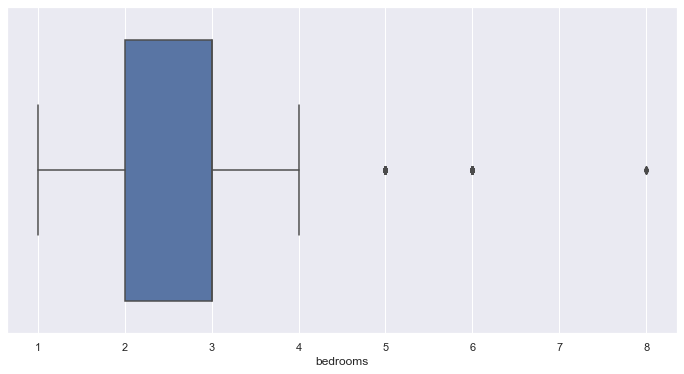

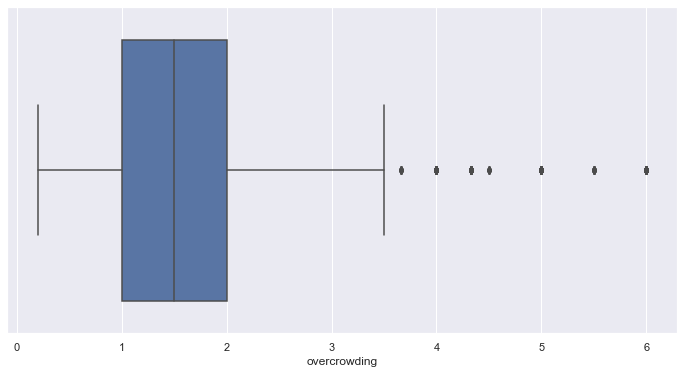

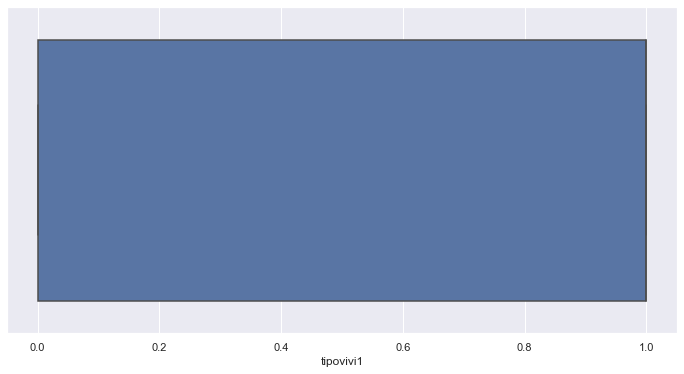

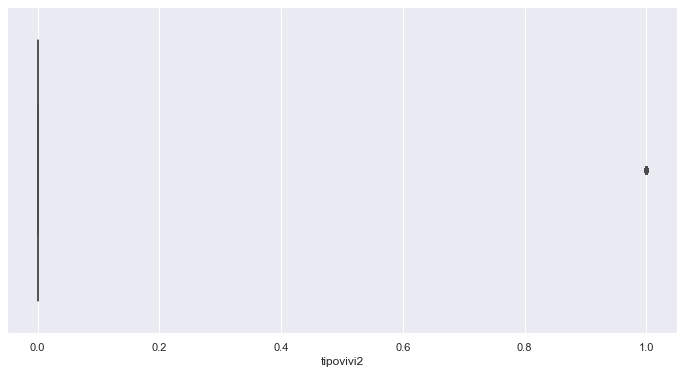

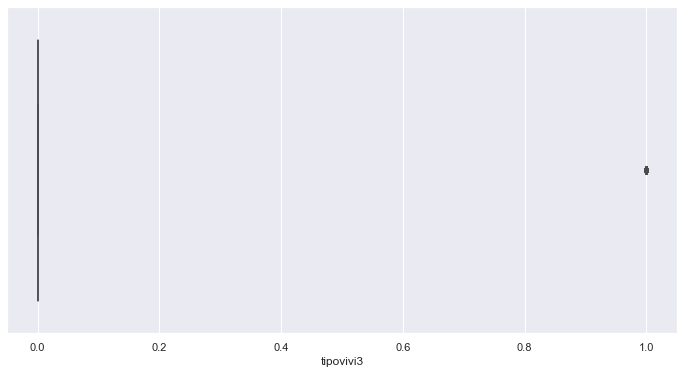

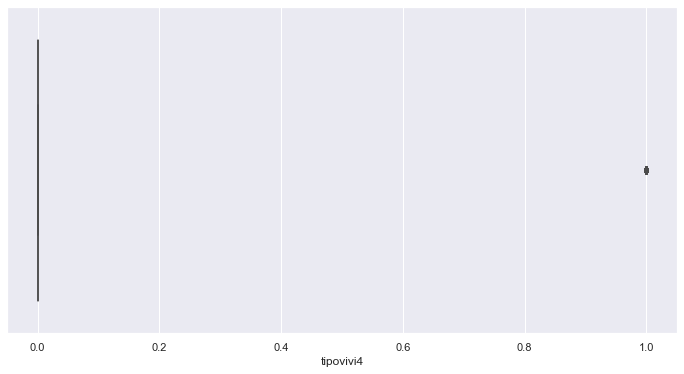

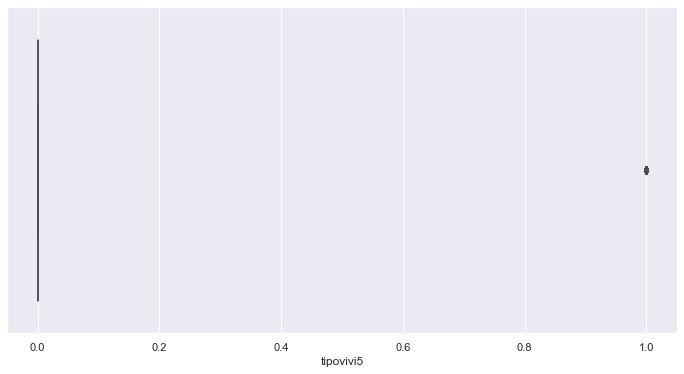

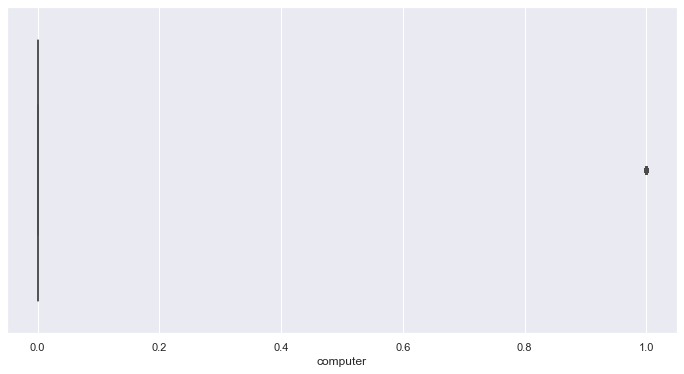

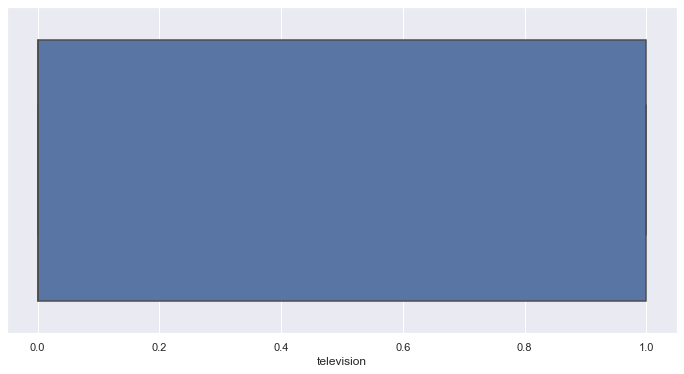

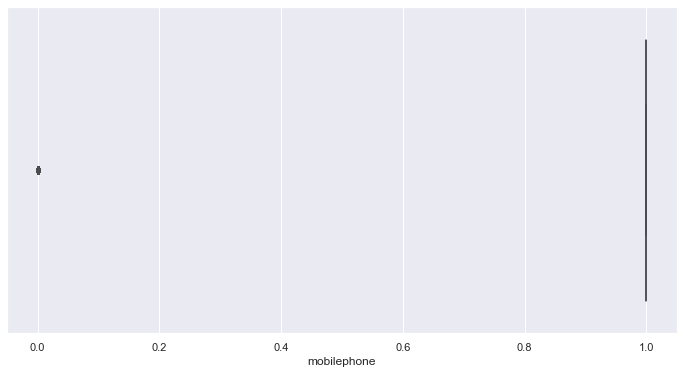

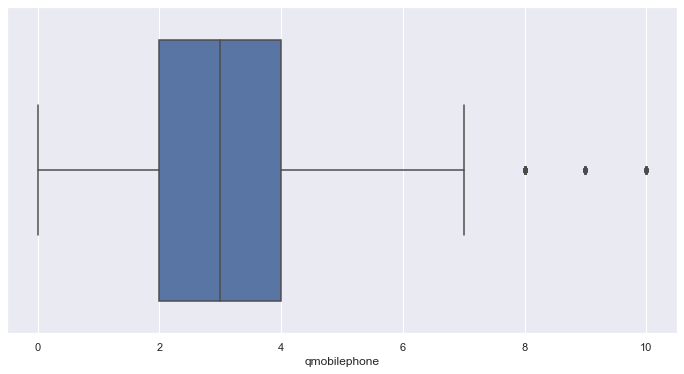

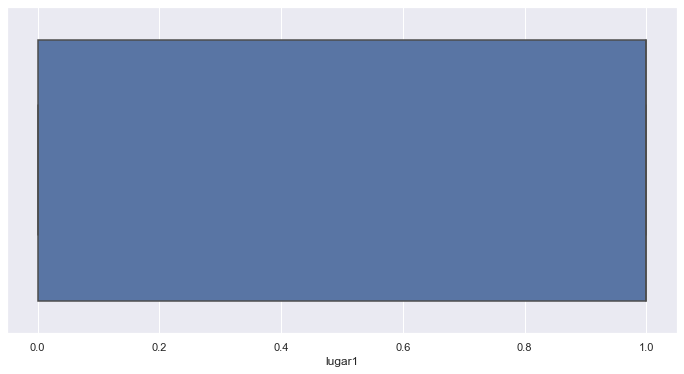

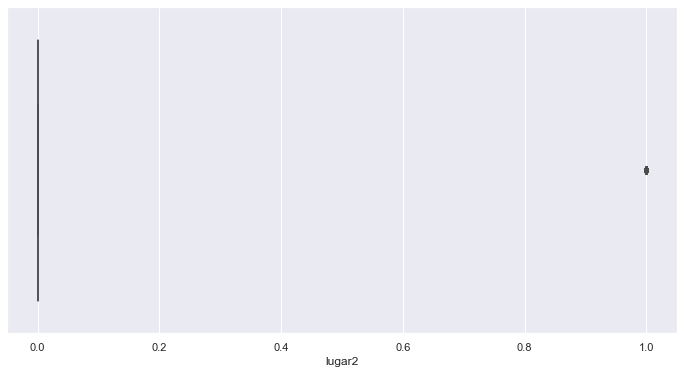

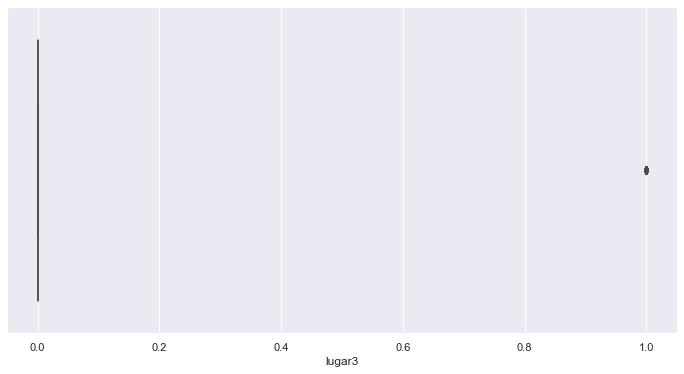

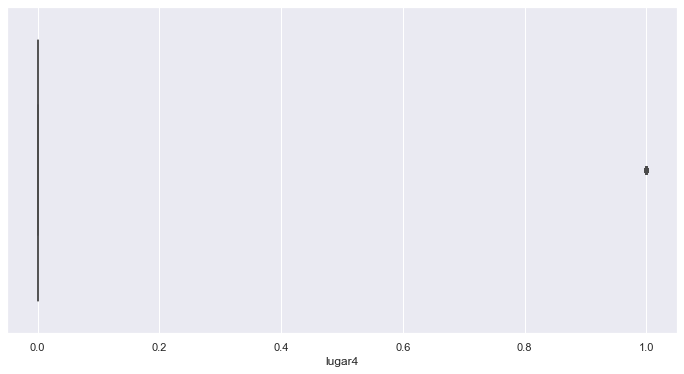

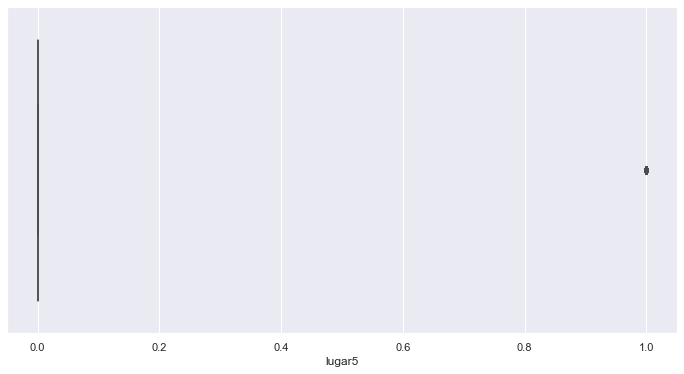

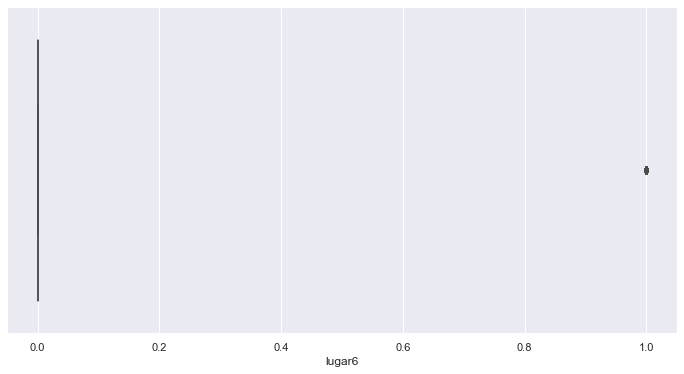

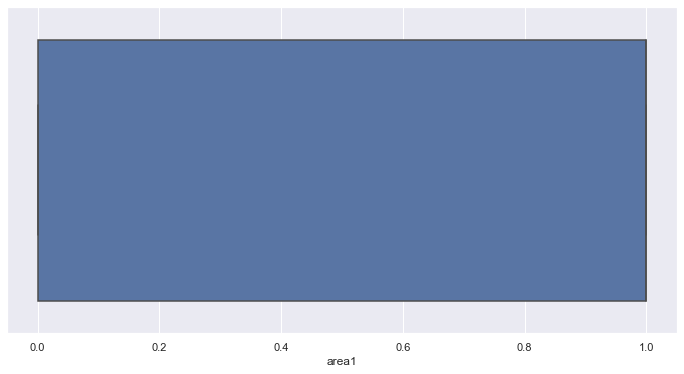

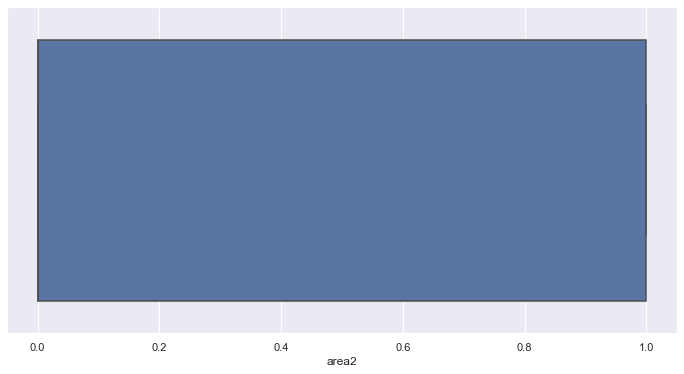

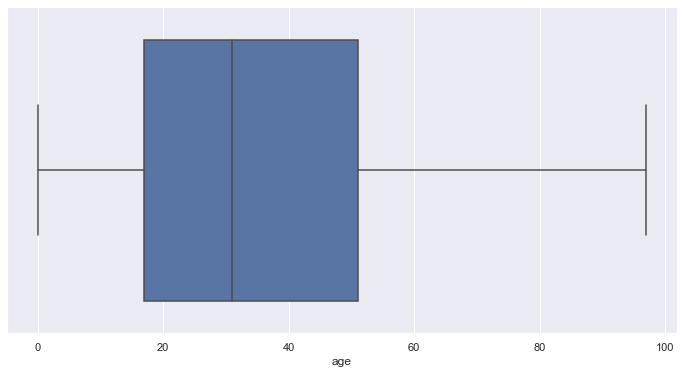

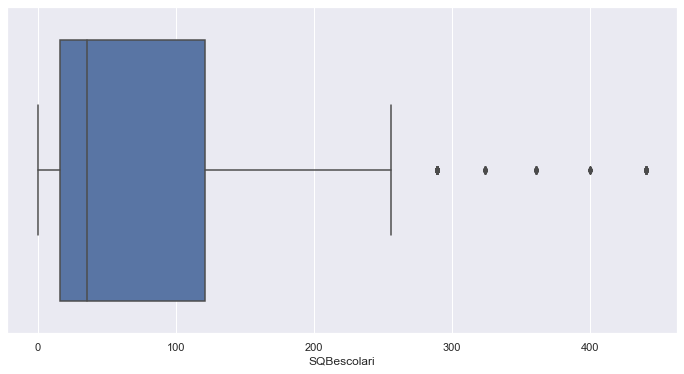

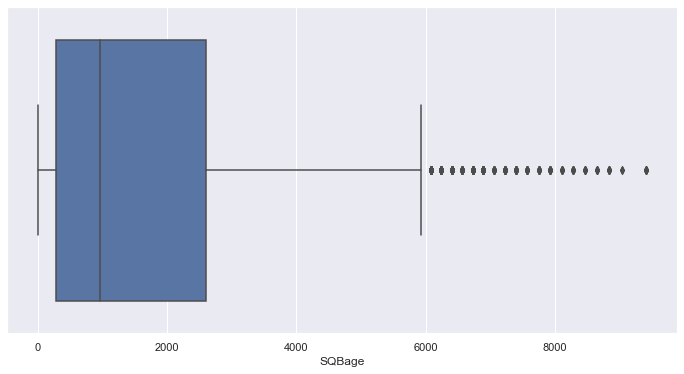

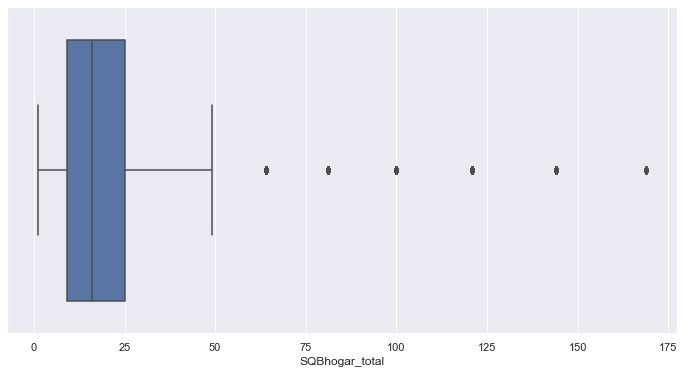

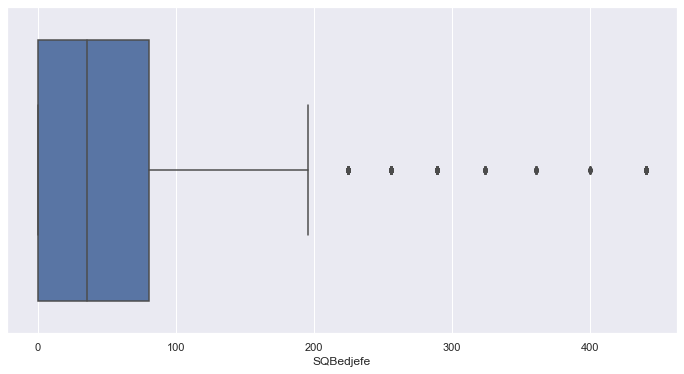

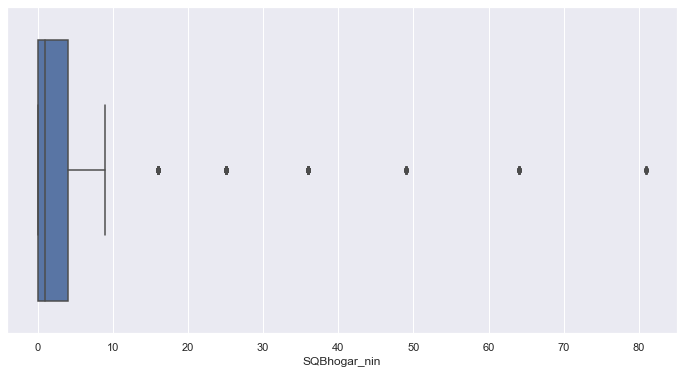

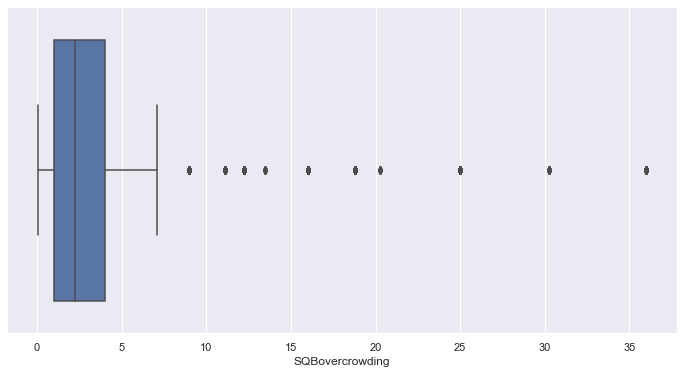

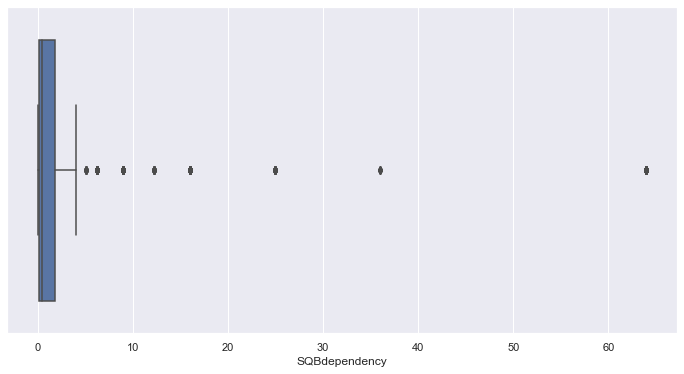

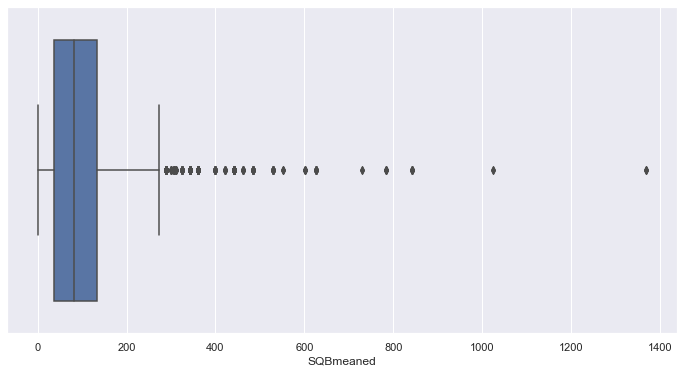

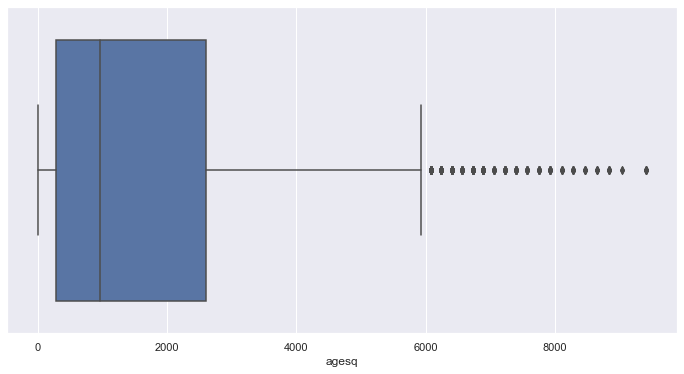

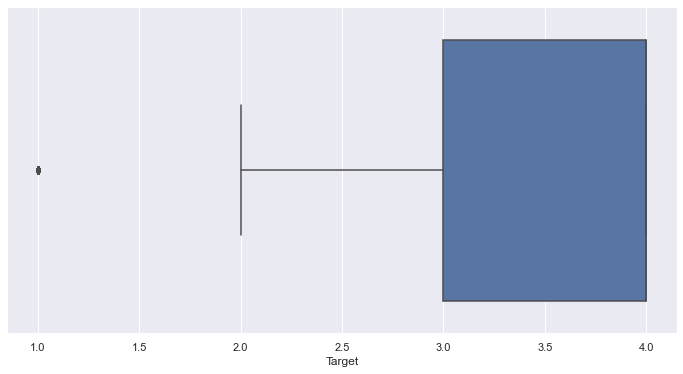

In [31]:
for i in outliers:
    if outliers[i].dtype != 'object':
        plt.figure(figsize = (12,6))
        sns.boxplot(x = i , data = outliers)

In [32]:
# Here in the object datatype dependency and edjefe and edjefa are object which we need to convert from object to numeric.

train_income['edjefe1'] = train_income.edjefe.replace({'yes' : float(1) , 'no' : float(0)})
train_income['edjefa1'] = train_income.edjefa.replace({'yes' : float(1) , 'no' : float(0)})
train_income['dependency1'] = train_income.dependency.replace({'yes' : float(1) , 'no' : float(0)})
train_income.loc[((train_income.edjefe == 'yes')|(train_income.edjefe == 'no')|(train_income.edjefa == 'yes')|(train_income.edjefa == 'no')|(train_income.dependency == 'yes')|(train_income.dependency == 'no')),
['edjefe','edjefe1','edjefa','edjefa1','dependency','dependency1']]

,edjefe,edjefe1,edjefa,edjefa1,dependency,dependency1
0,10,10,no,0.0,no,0.0
1,12,12,no,0.0,8,8
2,no,0.0,11,11,8,8
3,11,11,no,0.0,yes,1.0
4,11,11,no,0.0,yes,1.0
...,...,...,...,...,...,...
9552,9,9,no,0.0,.25,.25
9553,9,9,no,0.0,.25,.25
9554,9,9,no,0.0,.25,.25
9555,9,9,no,0.0,.25,.25


##### Here we convert the object yes or no into numeric 0 to 1 to better fit in our model.

##### -----------------------------------------------------------------------------------------------------------------------

### Task - 4  Check whether all members of the house have the same poverty level


In [33]:
# To check that members has same poverty level or not we to check Household level identifier [idhogar] for that and there is four
# types of poverty level as indicated by Target column. so we have to check with Target.

train_income.idhogar.unique()

array(['21eb7fcc1', '0e5d7a658', '2c7317ea8', ..., 'a8eeafc29',
       '212db6f6c', 'd6c086aa3'], dtype=object)

In [34]:
poverty_lvl = train_income.groupby(['idhogar', 'Target'])['idhogar'].count().to_frame().rename(columns = {'idhogar':'count'}).reset_index()
poverty_lvl.sort_values(by = ['count','Target'] , ascending = [False,True] , kind = 'quicksort' , ignore_index = True)

,idhogar,Target,count
0,fd8a6d014,1,13
1,ae6cf0558,3,12
2,0c7436de6,4,12
3,b7a0b59d7,2,11
4,4476ccd4c,4,11
...,...,...,...
3069,fdfb72694,4,1
3070,fe30320e4,4,1
3071,feb080b82,4,1
3072,fed6bc0bd,4,1


##### We can see from the above data that the ids from the corresponding house has single target type with single or multiple house members.So all the members of house have the same poverty level.

In [35]:
poverty_lvl.stack()

0     idhogar    001ff74ca
      Target             4
      count              2
1     idhogar    003123ec2
      Target             2
                   ...    
3072  Target             1
      count              4
3073  idhogar    fff7d6be1
      Target             4
      count              4
Length: 9222, dtype: object

###### ------------------------------------------------------------------------------------------------------------------------------------
### Task - 5 Check if there is a house without a family head.

In [36]:
train_income.escolari.unique()

array([10, 12, 11,  9,  2,  0,  3,  4, 15, 16,  6, 13,  8,  1, 17,  7, 14,
        5, 21, 19, 18, 20], dtype=int64)

In [37]:
train_income.groupby(['escolari' , 'parentesco1'])['parentesco1'].count().to_frame().stack()

escolari  parentesco1             
0         0            parentesco1    1172
          1            parentesco1     135
1         0            parentesco1     182
          1            parentesco1      65
2         0            parentesco1     229
          1            parentesco1      89
3         0            parentesco1     250
          1            parentesco1     151
4         0            parentesco1     222
          1            parentesco1      84
5         0            parentesco1     237
          1            parentesco1     109
6         0            parentesco1    1148
          1            parentesco1     837
7         0            parentesco1     369
          1            parentesco1     119
8         0            parentesco1     357
          1            parentesco1     141
9         0            parentesco1     406
          1            parentesco1     206
10        0            parentesco1     230
          1            parentesco1      67
11        0        

In [38]:
# To check wether the family with head or not we have to check the yes or no status of the parentesco1 of the household.

family_head = train_income['parentesco1'].value_counts().to_frame().reset_index().rename(columns = {'index':'FamilyHead' , 'parentesco1' : 'count'})
family_head

,FamilyHead,count
0,0,6584
1,1,2973


In [39]:
train_income['parentesco1'].value_counts(normalize = True)*100
print('Percentage of family head or without head \n \nWithout Head is - 68.89% \nWith Head is    - 31.10% ')

Percentage of family head or without head 
 
Without Head is - 68.89% 
With Head is    - 31.10% 


<Figure size 720x864 with 0 Axes>

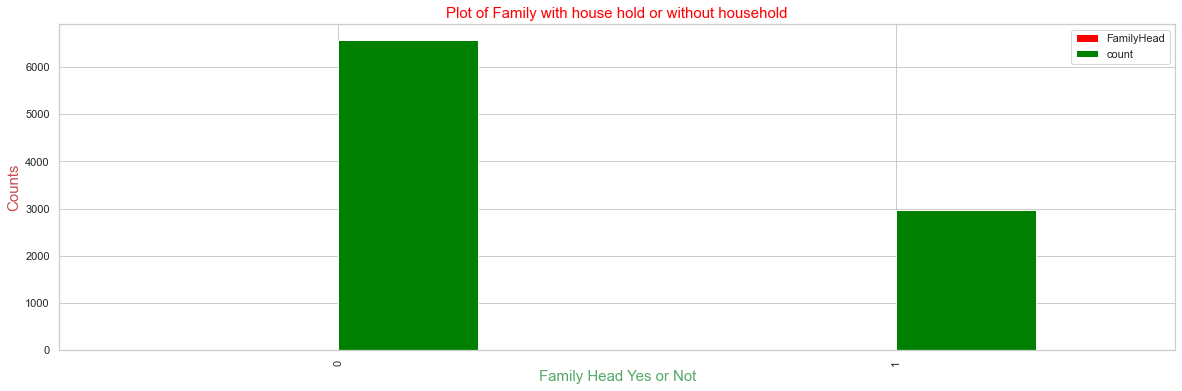

In [40]:
# Plotting the graph for the family head.
sns.set_style('whitegrid')
plt.figure(figsize = (10,12))
family_head.plot(kind = 'bar' , color = ['red','green'])
plt.title('Plot of Family with house hold or without household',size = 15 , color = 'red')
plt.xlabel('Family Head Yes or Not',size = 15,color = 'g')
plt.ylabel('Counts',size = 15 , color = 'r')
plt.grid(True)
plt.show()

###### -------------------------------------------------------------------------------------------------------------------------
### Task - 6 : Set the poverty level of the members and the head of the house same in a family. 

In [41]:
# We will run the for loop for that.
# There are different parameters which can be used in a various way to define the poverty level. However, 
# in a simple approach, we introduce a few parameters to define poverty level.
# we imputed nan value in 'v18q1' indicates the person does not have any tablets, so replaced by 0.
# We nan value in 'v2a1' indicates the person owns the house, so replaced by the mean value.

pover_lev = train_income[['v2a1','hhsize','rooms','v18q1','refrig']]
pover_lev = train_income.fillna(value = {'v18q1':0 , 'v2a1':0})
pover_lev['level'] = (pover_lev['v2a1']+pover_lev['v18q1']+pover_lev['hhsize']+pover_lev['rooms']+pover_lev['refrig'])

pover_med_rent = (pover_lev.v2a1[pover_lev.v2a1!=0].median()+pover_lev.rooms.median()+pover_lev.hhsize.median()+pover_lev.v18q1.median()+pover_lev.refrig.median()+1)
pover_med_own = (pover_lev.v2a1[pover_lev.v2a1==0].median()+pover_lev.rooms.median()+pover_lev.hhsize.median()+pover_lev.v18q1.median()+pover_lev.refrig.median()+1)

pover_mean_rent = (pover_lev.v2a1[pover_lev.v2a1!=0].mean()+pover_lev.rooms.mean()+pover_lev.hhsize.mean()+pover_lev.v18q1.mean()+pover_lev.refrig.mean()+1)
pover_mean_own = (pover_lev.v2a1[pover_lev.v2a1==0].mean()+pover_lev.rooms.mean()+pover_lev.hhsize.mean()+pover_lev.v18q1.mean()+pover_lev.refrig.mean()+1)

print('Index as per median for rent',pover_med_rent)
print('Index as per median for Ownership',pover_med_own)
print('Index as per mean for rent',pover_mean_rent)
print('Index as per mean for Ownership',pover_mean_own)

# Applying a for loop 

for i in range (len(pover_lev.v2a1)):
    if (((pover_lev.at[i,'v2a1']==0)&(pover_lev.at[i,'level']<pover_med_own))|
        ((pover_lev.at[i,'v2a1']!=0)&(pover_lev.at[i,'level']<pover_med_rent))):
        pover_lev.at[i,'Status(median)'] = 'Below proverty'
    else:
        pover_lev.at[i,'Status(median)'] = 'Above proverty'
        
for i in range (len(pover_lev.v2a1)):
    if (((pover_lev.at[i,'v2a1']==0)&(pover_lev.at[i,'level']<pover_mean_own))|
        ((pover_lev.at[i,'v2a1']!=0)&(pover_lev.at[i,'level']<pover_mean_rent))):
        pover_lev.at[i,'Status(mean)'] = 'Below proverty'
    else:
        pover_lev.at[i,'Status(mean)'] = 'Above proverty'       
        
pover_lev.sample(6)               
    


Index as per median for rent 130011.0
Index as per median for Ownership 11.0
Index as per mean for rent 167038.84032552104
Index as per mean for Ownership 11.237626870356808


,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBdependency,SQBmeaned,agesq,Target,edjefe1,edjefa1,dependency1,level,Status(median),Status(mean)
1173,ID_2baf1f7a7,130000.0,0,4,0,1,1,0,0.0,0,...,4.00,324.000000,1444,4,0.0,11,2,130011.0,Above proverty,Below proverty
9463,ID_ad6947cd9,0.0,0,3,0,1,1,0,0.0,0,...,0.25,1.777778,4624,1,1.0,0.0,.5,7.0,Below proverty,Below proverty
9069,ID_3232859dd,0.0,0,4,0,1,1,0,0.0,1,...,2.25,36.000000,64,3,6,0.0,1.5,10.0,Below proverty,Below proverty
7198,ID_dfa09aab9,65000.0,0,3,0,1,0,0,0.0,1,...,9.00,36.000000,900,2,0.0,6,3,65007.0,Below proverty,Below proverty
6627,ID_3eeb6f727,0.0,0,4,0,1,1,1,1.0,0,...,9.00,169.000000,2809,3,9,0.0,3,10.0,Below proverty,Below proverty
6557,ID_48558ef17,0.0,0,7,0,1,1,0,0.0,0,...,4.00,121.000000,225,2,5,0.0,2,14.0,Above proverty,Above proverty


In [42]:
# checking the poverty level below median  and above median or below mean and above mean.
pover_lev['Status(median)'].value_counts()

Below proverty    5365
Above proverty    4192
Name: Status(median), dtype: int64

In [43]:
pover_lev['Status(mean)'].value_counts()

Below proverty    6743
Above proverty    2814
Name: Status(mean), dtype: int64

### Task 7 - Count how many null values are existing in columns. - Data Cleaning

In [44]:
# finding the columns that is null values.
train_income.select_dtypes('int64').isna().sum()

hacdor            0
rooms             0
hacapo            0
v14a              0
refrig            0
                 ..
SQBhogar_total    0
SQBedjefe         0
SQBhogar_nin      0
agesq             0
Target            0
Length: 130, dtype: int64

In [45]:
null_val = train_income.select_dtypes('float64').isna().sum()
null_val

v2a1               6860
v18q1              7342
rez_esc            7928
meaneduc              5
overcrowding          0
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
dtype: int64

In [46]:
train_income.select_dtypes('object').isna().sum()

Id             0
idhogar        0
dependency     0
edjefe         0
edjefa         0
edjefe1        0
edjefa1        0
dependency1    0
dtype: int64

##### In integer datatypes we have three columns of null values which have huge amount of null values.
##### In float datatypes we have three columns of null values which have huge amount of null values.
##### In object datatypes we have three columns of null values which have no null values.

In [47]:
## Finding the percentage of null values in the columns of the dataset.

perc_null = train_income.isna().sum()/len(train_income)*100
null_per = perc_null.sort_values(ascending = False)
null_per.to_frame()

,0
rez_esc,82.954902
v18q1,76.823271
v2a1,71.779847
SQBmeaned,0.052318
meaneduc,0.052318
...,...
sanitario2,0.000000
sanitario3,0.000000
sanitario5,0.000000
sanitario6,0.000000


In [48]:
print("Columns - Percent    Values\nrez_esc - 82.95%     7928 \n v18q1  - 76.82%     7342 \n v2a1   - 71.77      6860 " )

Columns - Percent    Values
rez_esc - 82.95%     7928 
 v18q1  - 76.82%     7342 
 v2a1   - 71.77      6860 


### Task - 8 Remove null value rows of the target variable.

##### We impute the missing values by median of float datatypes which contain all the null values and again checking the info find the same features of all datatypes

In [49]:
train_income.Target.isna().sum() # Target variable has no null values.

0

In [50]:
# Target variable has no null values.
#Dropping the null values rows.

train1 = train_income.dropna()
train1.shape

(156, 146)

#### Dropping the null values yeilds a smaller part of the data which cannot be fit for the model building and prediction.

In [51]:
# So we have to impute the null values by appropriate values using statistical analysis.

train_income.isna().sum().sort_values(ascending = False)

rez_esc        7928
v18q1          7342
v2a1           6860
SQBmeaned         5
meaneduc          5
               ... 
sanitario2        0
sanitario3        0
sanitario5        0
sanitario6        0
dependency1       0
Length: 146, dtype: int64

In [52]:
# We can fill the missing values simply get median of float data types as all missing values columns are of float datatypes.

#for i in train_income.columns:
#    if train_income[i].isna().sum() and train_income[i].dtypes =='float64':
#        train_income[i].loc[(train_income[i].isna())] = train_income[i].median()

In [53]:
# But v18q1 represent the availability of tablets with 1 or 0 so NaN can be fill by 0 by assuming no tablets.
# Similar v2q1 represents the ownner of house that has numerical values and rent owned consider as 0 so further NaN can be 
# replaced by 0.
train = train_income.replace(np.NaN , {'v18q1' : 0 ,'v2a1':0})
train

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,edjefe1,edjefa1,dependency1
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,100,0,1.000000,0.0000,100.0000,1849,4,10,0.0,0.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,0,1.000000,64.0000,144.0000,4489,4,12,0.0,8
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,0,0,0.250000,64.0000,121.0000,8464,4,0.0,11,8
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,121,4,1.777778,1.0000,121.0000,289,4,11,0.0,1.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,4,1.777778,1.0000,121.0000,1369,4,11,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,0.0,0,...,81,1,1.562500,0.0625,68.0625,2116,2,9,0.0,.25
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,0.0,0,...,81,1,1.562500,0.0625,68.0625,4,2,9,0.0,.25
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,0.0,0,...,81,1,1.562500,0.0625,68.0625,2500,2,9,0.0,.25
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,0.0,0,...,81,1,1.562500,0.0625,68.0625,676,2,9,0.0,.25


In [54]:
# Now replacing the SQBmeaned and meaneduc either by means and median values or mode values depend on the statistically lookout.
# So finding the mean , median and mode for meaneduc and SQBmeaned.
mean = train[['meaneduc','SQBmeaned']].mean()
mean

meaneduc       9.231523
SQBmeaned    102.588867
dtype: float64

In [55]:
median = train[['meaneduc','SQBmeaned']].median()
median

meaneduc      9.0
SQBmeaned    81.0
dtype: float64

In [56]:
mode = train[['meaneduc','SQBmeaned']].mode()
mode

,meaneduc,SQBmeaned
0,6.0,36.0


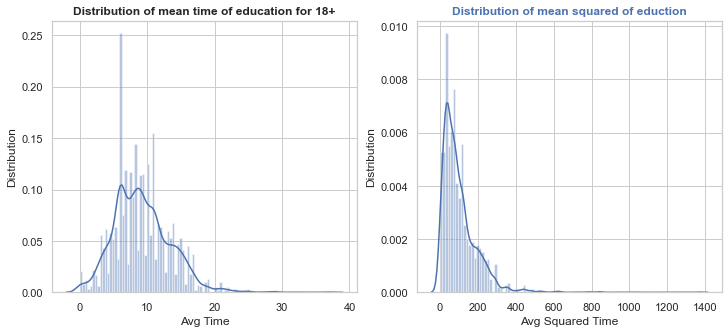

In [57]:
# Plotting the distribution curve to check the effect of mean  as both has outliers.

sns.set_style('whitegrid')
fig , ax = plt.subplots(1,2, figsize = (12,5))
mean_educ = sns.distplot(train.meaneduc , kde = True , bins = 100 , ax = ax[0])
mean_educ.set_title('Distribution of mean time of education for 18+' ,weight = 'bold')
mean_educ.set_xlabel('Avg Time')
mean_educ.set_ylabel('Distribution')

mean_SQBedu = sns.distplot(train.SQBmeaned , kde = True , bins = 100 , ax = ax[1])
mean_SQBedu.set_title('Distribution of mean squared of eduction',weight = 'bold' , color = 'b')
mean_SQBedu.set_xlabel('Avg Squared Time')
mean_SQBedu.set_ylabel('Distribution')
plt.show()

In [58]:
# It is clearly seen by distribution curve that for meaneduc the curve is normally distributed so that mean and median is same
# for the meaneduc and can be filled na values eighter by mean or median but for SQBmeaned the curve is right skewed which is
# not normally distributed in this case mean values should be filled for SQBmeaned.

# filling the mean values for both meaneduc and SQBmeaned.

train = train.fillna(value = {'meaneduc':train.meaneduc.mean() , 'SQBmeaned':train.SQBmeaned.mean()})
train

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,edjefe1,edjefa1,dependency1
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,100,0,1.000000,0.0000,100.0000,1849,4,10,0.0,0.0
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,0,1.000000,64.0000,144.0000,4489,4,12,0.0,8
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,0,0,0.250000,64.0000,121.0000,8464,4,0.0,11,8
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,121,4,1.777778,1.0000,121.0000,289,4,11,0.0,1.0
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,4,1.777778,1.0000,121.0000,1369,4,11,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,ID_d45ae367d,80000.0,0,6,0,1,1,0,0.0,0,...,81,1,1.562500,0.0625,68.0625,2116,2,9,0.0,.25
9553,ID_c94744e07,80000.0,0,6,0,1,1,0,0.0,0,...,81,1,1.562500,0.0625,68.0625,4,2,9,0.0,.25
9554,ID_85fc658f8,80000.0,0,6,0,1,1,0,0.0,0,...,81,1,1.562500,0.0625,68.0625,2500,2,9,0.0,.25
9555,ID_ced540c61,80000.0,0,6,0,1,1,0,0.0,0,...,81,1,1.562500,0.0625,68.0625,676,2,9,0.0,.25


In [59]:
##  Since rez_esc has null values more that 80% which is too much significant so can drop the columns column rez_esc.
# Along with we can drop the columns that object type and which we converted as numeric type like dependency	edjefe	edjefa 
# & idhogar and id columns and kept the 

train = train.drop(columns = {'rez_esc' , 'dependency','edjefe','edjefa','Id','idhogar'})
train

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,edjefe1,edjefa1,dependency1
0,190000.0,0,3,0,1,1,0,0.0,0,1,...,100,0,1.000000,0.0000,100.0000,1849,4,10,0.0,0.0
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,0,1.000000,64.0000,144.0000,4489,4,12,0.0,8
2,0.0,0,8,0,1,1,0,0.0,0,0,...,0,0,0.250000,64.0000,121.0000,8464,4,0.0,11,8
3,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,4,1.777778,1.0000,121.0000,289,4,11,0.0,1.0
4,180000.0,0,5,0,1,1,1,1.0,0,2,...,121,4,1.777778,1.0000,121.0000,1369,4,11,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9552,80000.0,0,6,0,1,1,0,0.0,0,2,...,81,1,1.562500,0.0625,68.0625,2116,2,9,0.0,.25
9553,80000.0,0,6,0,1,1,0,0.0,0,2,...,81,1,1.562500,0.0625,68.0625,4,2,9,0.0,.25
9554,80000.0,0,6,0,1,1,0,0.0,0,2,...,81,1,1.562500,0.0625,68.0625,2500,2,9,0.0,.25
9555,80000.0,0,6,0,1,1,0,0.0,0,2,...,81,1,1.562500,0.0625,68.0625,676,2,9,0.0,.25


In [60]:
train.isna().sum().any()

False

In [61]:
# We get the Target column in  between so we need to shift the target column in the last of the dataframe.

train = train[[col for col in train.columns if col!= 'Target']+['Target']]
train.head(2)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,edjefe1,edjefa1,dependency1,Target
0,190000.0,0,3,0,1,1,0,0.0,0,1,...,100,0,1.0,0.0,100.0,1849,10,0.0,0.0,4
1,135000.0,0,4,0,1,1,1,1.0,0,1,...,144,0,1.0,64.0,144.0,4489,12,0.0,8,4


#### ------------------------------------------------------------------------------------------------------------------------------------

### Task - 9 Predict the accuracy with Random Forest Classifier



In [62]:
# Importing the Libraries.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import confusion_matrix , classification_report

In [63]:
# Splitting the model into train and test.
# As Random Forest is not distance based algorithim so standard scaling is not required in this alogirithim.

X = train.drop('Target' , axis = 1)
y = train['Target']
X_train , X_test , y_train , y_test = train_test_split(X,  y,  test_size = 0.2,random_state = 7)

In [64]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7645, 139)
(1912, 139)
(7645,)
(1912,)


In [65]:
X_train.head(2)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,edjefe1,edjefa1,dependency1
2731,200000.0,0,4,0,1,1,1,1.0,0,0,...,4,0,1,0.444444,1.00,121.000000,900,0.0,11,1.0
7431,0.0,0,5,0,1,1,0,0.0,0,1,...,25,196,4,6.250000,2.25,87.111107,961,14,0.0,1.5


In [66]:
X_test.head(2)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,edjefe1,edjefa1,dependency1
7824,0.0,0,5,0,1,1,0,0.0,0,2,...,9,36,1,1.0000,0.25,36.0,196,6,0.0,.5
3567,0.0,0,7,0,1,1,1,2.0,0,2,...,9,225,0,0.5625,0.00,196.0,3249,15,0.0,0.0


In [67]:
y_train.head(2)

2731    3
7431    4
Name: Target, dtype: int64

In [68]:
y_test.head(2)

7824    2
3567    4
Name: Target, dtype: int64

In [145]:
# Fitting the model and predicting.

RF = RandomForestClassifier(n_estimators = 150 , criterion = 'entropy' , min_samples_split = 5 , min_samples_leaf = 3 ,  max_depth = 15)
RF

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=150)

In [146]:
model = RF.fit(X_train,y_train)
model

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=3,
                       min_samples_split=5, n_estimators=150)

In [147]:
y_pred = model.predict(X_test)
y_pred

array([2, 4, 4, ..., 4, 4, 2], dtype=int64)

In [148]:
pd.DataFrame(RF.feature_importances_ , index = X_train.columns).sort_values(0 , ascending = False).rename({0 : 'Effect on target'},axis = 1)

,Effect on target
SQBmeaned,0.056996
meaneduc,0.052072
dependency1,0.035257
SQBdependency,0.033564
overcrowding,0.027667
...,...
elimbasu5,0.000000
parentesco8,0.000000
pisoother,0.000000
elimbasu6,0.000000


##### So effect on target variable  is as SQBmeaned > meaneduc > dependency1 > SQBdependency > Hogar_min.

In [149]:
## Getting and confusion matrix for the model.

conf_mat = confusion_matrix(y_pred , y_test)
conf_mat

array([[ 101,    3,    0,    2],
       [  13,  218,   15,   10],
       [   0,    6,  131,    0],
       [  36,   84,   96, 1197]], dtype=int64)

In [150]:
## Getting classification matrix for the model.
class_mat = classification_report(y_pred , y_test)
print(class_mat)

              precision    recall  f1-score   support

           1       0.67      0.95      0.79       106
           2       0.70      0.85      0.77       256
           3       0.54      0.96      0.69       137
           4       0.99      0.85      0.91      1413

    accuracy                           0.86      1912
   macro avg       0.73      0.90      0.79      1912
weighted avg       0.90      0.86      0.87      1912



In [151]:
from sklearn.metrics import accuracy_score , f1_score

# Accuracy score for train data and test data.

RF.score(X_train , y_train)

0.9415304120340091

In [152]:
# Accuracy score for test data.

accuracy_score(RF.predict(X_test) , y_test)

0.8614016736401674

In [77]:
### Making the grid search cv.

param_grid = {'n_estimators': [100,200,300] , 'criterion':['gini','entropy'], 'min_samples_split' : [5,10,20], 
             'max_depth': [5,10,15]}
param_grid

{'n_estimators': [100, 200, 300],
 'criterion': ['gini', 'entropy'],
 'min_samples_split': [5, 10, 20],
 'max_depth': [5, 10, 15]}

In [78]:
p_grid = GridSearchCV(RF , param_grid , verbose = 1 , n_jobs = -1 , refit=True , scoring = 'accuracy')
p_grid

GridSearchCV(estimator=RandomForestClassifier(criterion='entropy', max_depth=15,
                                              min_samples_leaf=5,
                                              min_samples_split=5,
                                              n_estimators=200),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [79]:
p_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestClassifier(criterion='entropy', max_depth=15,
                                              min_samples_leaf=5,
                                              min_samples_split=5,
                                              n_estimators=200),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_split': [5, 10, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [80]:
pred_y = p_grid.predict(X_test)
pred_y

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [81]:
p_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_split': 5,
 'n_estimators': 300}

In [82]:
print(classification_report(pred_y,y_test))

              precision    recall  f1-score   support

           1       0.57      0.98      0.72        88
           2       0.63      0.82      0.71       239
           3       0.45      0.96      0.61       113
           4       0.99      0.81      0.89      1472

    accuracy                           0.83      1912
   macro avg       0.66      0.89      0.73      1912
weighted avg       0.89      0.83      0.84      1912



In [83]:
print(confusion_matrix(pred_y,y_test))

[[  86    1    1    0]
 [  16  195   13   15]
 [   0    5  108    0]
 [  48  110  120 1194]]


In [84]:
p_grid.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=300)

In [85]:
accuracy_score(pred_y , y_test)

0.827928870292887

### 

##### Working on test data - and  prediction on the test dataset

In [86]:
test = test_income
test.head(2)

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,NaN,0,5,0,1,1,0,NaN,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,NaN,0,5,0,1,1,0,NaN,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681


In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


In [88]:
print('Features of datatypes :\n' , 'Float -->8\n' ,'Int----->129\n' , 'Object-->5')

Features of datatypes :
 Float -->8
 Int----->129
 Object-->5


In [89]:
test.describe() # Summary of numeric column.

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
count,6.453000e+03,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,5730.000000,23856.000000,23856.000000,...,23856.000000,23856.00000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23825.000000,23856.000000
mean,1.748726e+05,0.050679,4.955776,0.028421,0.992748,0.961603,0.240191,1.348517,0.416541,1.563967,...,34.454183,74.44974,1657.798080,19.113389,54.087232,3.885480,3.564751,4.171669,100.509220,1657.798080
std,1.567887e+05,0.219346,1.539753,0.166174,0.084850,0.192157,0.427208,0.694216,0.713255,0.990171,...,21.696245,76.99701,1753.603406,17.314597,77.312255,6.878967,6.668757,13.105989,89.211063,1753.603406
min,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000
25%,8.000000e+04,0.000000,4.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,16.000000,16.00000,256.000000,9.000000,0.000000,0.000000,1.000000,0.111111,36.000000,256.000000
50%,1.400000e+05,0.000000,5.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,32.000000,36.00000,1024.000000,16.000000,36.000000,1.000000,2.250000,0.444444,75.111115,1024.000000
75%,2.200000e+05,0.000000,6.000000,0.000000,1.000000,1.000000,0.000000,1.750000,1.000000,2.000000,...,51.000000,121.00000,2601.000000,25.000000,81.000000,4.000000,4.000000,1.777778,132.250000,2601.000000
max,2.852700e+06,1.000000,15.000000,1.000000,1.000000,1.000000,1.000000,6.000000,6.000000,7.000000,...,97.000000,441.00000,9409.000000,169.000000,441.000000,100.000000,169.000000,64.000000,1296.000000,9409.000000


In [90]:
test.describe(include = 'object')

,Id,idhogar,dependency,edjefe,edjefa
count,23856,23856,23856,23856,23856
unique,23856,7352,35,22,22
top,ID_1893c8541,9a906088e,yes,no,no
freq,1,13,5388,9056,15845


###### In the object datatypes dependency ,edjefe , edjefa has columns object type which we have to convert from object to numeric
###### to better fit in our model and prediction.Moreover we can remove Id and idhogar columns also.

In [91]:
# Converting the object to numeric ----yes as 1 or no as 0.

test['edjefe2'] = test.edjefe.replace({'yes' : float(1) , 'no': float(0)})

test['edjefa2'] = test.edjefa.replace({'yes' : float(1) , 'no': float(0)})

test['dependency2'] = test.dependency.replace({'yes' : float(1) , 'no' : float(0)})

# Adding all the new created columns of numeric type.

test.loc[((test['edjefe'] == 'yes')|(test['edjefe'] == 'no')|(test['edjefa'] == 'yes')|(test['edjefa'] == 'no')|(test['dependency'] == 'yes')|(test['dependency'] == 'no')),
        ['edjefe','edjefa','dependency','edjefe2','edjefa2','dependency2']]
         

,edjefe,edjefa,dependency,edjefe2,edjefa2,dependency2
0,no,17,.5,0.0,17,.5
1,no,17,.5,0.0,17,.5
2,no,17,.5,0.0,17,.5
3,16,no,no,16,0.0,0.0
4,no,11,8,0.0,11,8
...,...,...,...,...,...,...
23851,5,no,.5,5,0.0,.5
23852,6,no,yes,6,0.0,1.0
23853,6,no,yes,6,0.0,1.0
23854,6,no,yes,6,0.0,1.0


##### We have convert the columns from object to numeric type.

In [92]:
# We can further drop the columns Id , Idhogar , edjefe , edjefa , dependency.
test = test.drop(['Id','idhogar','dependency','edjefe','edjefa'],axis = 1)
test.head(5)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,edjefe2,edjefa2,dependency2
0,NaN,0,5,0,1,1,0,NaN,1,1,...,9,0,1,2.25,0.25,272.25,16,0.0,17,.5
1,NaN,0,5,0,1,1,0,NaN,1,1,...,9,0,1,2.25,0.25,272.25,1681,0.0,17,.5
2,NaN,0,5,0,1,1,0,NaN,1,1,...,9,0,1,2.25,0.25,272.25,1681,0.0,17,.5
3,NaN,0,14,0,1,1,1,1.0,0,1,...,1,256,0,1.00,0.00,256.00,3481,16,0.0,0.0
4,175000.0,0,4,0,1,1,1,1.0,0,0,...,1,0,1,0.25,64.00,NaN,324,0.0,11,8


In [93]:
# Checking the null values and removing the same as per previous on train dataset.
test.isna().sum().sort_values(ascending = False)

rez_esc            19653
v18q1              18126
v2a1               17403
SQBmeaned             31
meaneduc              31
                   ...  
abastaguafuera         0
abastaguadentro        0
cielorazo              0
techootro              0
dependency2            0
Length: 140, dtype: int64

In [94]:
perc_null = test.isna().sum()/len(test)*100
perc_null.sort_values(ascending = False).to_frame().reset_index().rename({'index':'Columns', 0 : 'Percentage_Null'},axis = 1)

,Columns,Percentage_Null
0,rez_esc,82.381791
1,v18q1,75.980885
2,v2a1,72.950201
3,SQBmeaned,0.129946
4,meaneduc,0.129946
...,...,...
135,abastaguafuera,0.000000
136,abastaguadentro,0.000000
137,cielorazo,0.000000
138,techootro,0.000000


###### As mentioned above rez_esc has more than 82% and that column can be dropped further and v18q1  has null  values  75% denotes while have tablets by 1 or not have tablets denote by 0 so considering the NaN in v18q1 by 0 that do not have tablet , v2a1 has null values 72% denotes house owned or rent so NaN can be replace by 0 which further shows that house is owned and not paid rent. And SQBmeaned and meaneduc null values is 12% which can be filled further by statistically measure either mean or median.

In [95]:
# Imputing the null values as per mentioned.And dropping the column rez_esc.

test = test.fillna(value = {'v18q1': 0 , 'v2a1': 0})
test.head(5)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,edjefe2,edjefa2,dependency2
0,0.0,0,5,0,1,1,0,0.0,1,1,...,9,0,1,2.25,0.25,272.25,16,0.0,17,.5
1,0.0,0,5,0,1,1,0,0.0,1,1,...,9,0,1,2.25,0.25,272.25,1681,0.0,17,.5
2,0.0,0,5,0,1,1,0,0.0,1,1,...,9,0,1,2.25,0.25,272.25,1681,0.0,17,.5
3,0.0,0,14,0,1,1,1,1.0,0,1,...,1,256,0,1.00,0.00,256.00,3481,16,0.0,0.0
4,175000.0,0,4,0,1,1,1,1.0,0,0,...,1,0,1,0.25,64.00,NaN,324,0.0,11,8


<AxesSubplot:xlabel='SQBmeaned', ylabel='Density'>

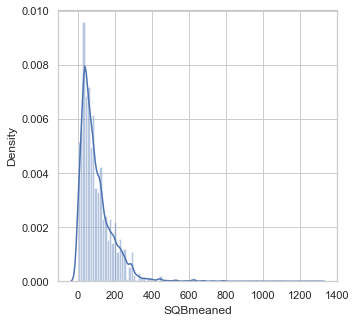

In [96]:
# Filling the null values in meaneduc and SQBmeaned.
plt.figure(figsize = (5,5))
sns.distplot(test.SQBmeaned , kde = True , bins = 100)

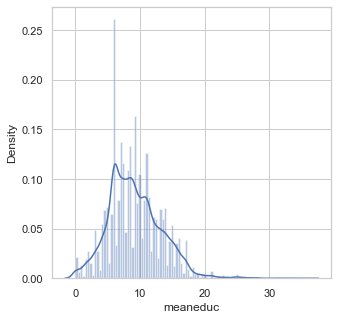

In [97]:
plt.figure(figsize = (5,5))

sns.distplot(test.meaneduc , kde = True , bins = 100)

plt.show()

###### In meaneduc mean median and mode are almost same so it can be filled by either mean or median and SQBmeaned is positive skewed so it is filled by mean


In [98]:
### Imputing the null values.
test = test.fillna(value = {'meaneduc' :test.meaneduc.mean() , 'SQBmeaned' : test.SQBmeaned.mean()})
test.head()

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,edjefe2,edjefa2,dependency2
0,0.0,0,5,0,1,1,0,0.0,1,1,...,9,0,1,2.25,0.25,272.25000,16,0.0,17,.5
1,0.0,0,5,0,1,1,0,0.0,1,1,...,9,0,1,2.25,0.25,272.25000,1681,0.0,17,.5
2,0.0,0,5,0,1,1,0,0.0,1,1,...,9,0,1,2.25,0.25,272.25000,1681,0.0,17,.5
3,0.0,0,14,0,1,1,1,1.0,0,1,...,1,256,0,1.00,0.00,256.00000,3481,16,0.0,0.0
4,175000.0,0,4,0,1,1,1,1.0,0,0,...,1,0,1,0.25,64.00,100.50922,324,0.0,11,8


In [99]:
# Dropping the columns rez_esc

test = test.drop(['rez_esc'],axis = 1)
test.head(2)

,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,...,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,edjefe2,edjefa2,dependency2
0,0.0,0,5,0,1,1,0,0.0,1,1,...,9,0,1,2.25,0.25,272.25,16,0.0,17,.5
1,0.0,0,5,0,1,1,0,0.0,1,1,...,9,0,1,2.25,0.25,272.25,1681,0.0,17,.5


In [100]:
test.isna().sum().sort_values(ascending = False)

v2a1               0
hogar_mayor        0
parentesco9        0
parentesco10       0
parentesco11       0
                  ..
abastaguadentro    0
cielorazo          0
techootro          0
techocane          0
dependency2        0
Length: 139, dtype: int64

In [101]:
test.shape


(23856, 139)

In [102]:
# Now Prediction the test dataset.
model_pred = RF.predict(test)
model_pred

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [103]:
## Checking the accuracy using Random Forest Classifier Cross Validation.

param_grid = {'n_estimators':[50,150,300] , 'criterion': ['gini' ,'entropy'] , 'min_samples_split' : [5,10,15],'max_depth': [5,10,15]}
param_grid

{'n_estimators': [50, 150, 300],
 'criterion': ['gini', 'entropy'],
 'min_samples_split': [5, 10, 15],
 'max_depth': [5, 10, 15]}

In [105]:
pgrid = GridSearchCV(RFC , param_grid , n_jobs = -1 , verbose = 1 , scoring = 'accuracy')
pgrid

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [50, 150, 300]},
             scoring='accuracy', verbose=1)

In [106]:
pgrid.fit(X_train , y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [50, 150, 300]},
             scoring='accuracy', verbose=1)

In [111]:
pred_test = pgrid.predict(X_test)
pred_test

array([2, 4, 4, ..., 4, 4, 2], dtype=int64)

In [121]:
pgrid.score(X_train,y_train)

0.972531066056246

In [115]:
pgrid.score(X_test,y_test)

0.8870292887029289

In [154]:
accuracy_score(pred_test,y_test)

0.8870292887029289

In [156]:
f1_score(pred_test,y_test , average = 'weighted')

0.8931940005652862

In [123]:
confusion_matrix(pred_test , y_test)

array([[ 109,    5,    0,    1],
       [  12,  227,   10,    4],
       [   0,    7,  156,    0],
       [  29,   72,   76, 1204]], dtype=int64)

In [153]:
print(classification_report(pred_test,y_test))

              precision    recall  f1-score   support

           1       0.73      0.95      0.82       115
           2       0.73      0.90      0.80       253
           3       0.64      0.96      0.77       163
           4       1.00      0.87      0.93      1381

    accuracy                           0.89      1912
   macro avg       0.77      0.92      0.83      1912
weighted avg       0.91      0.89      0.89      1912



In [128]:
pgrid.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'min_samples_split': 5,
 'n_estimators': 150}

In [129]:
pgrid.best_score_

0.8661870503597123

In [127]:
pgrid.predict(test)

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

#### On test data we can predict with grid search prediction can be done on Random Forest model.